In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 800)


In [2]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=False)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df).sort_values(by="Ratio", ascending=False)
    return missing_df


def check_df(dataframe, head=5, tail=5):
    print("*" * 70)
    print(" Shape ".center(70, "*"))
    print("*" * 70)
    print(dataframe.shape)

    print("*" * 70)
    print(" Types ".center(70, "*"))
    print("*" * 70)
    print(dataframe.dtypes)

    print("*" * 70)
    print(" Head ".center(70, "*"))
    print("*" * 70)
    print(dataframe.head(head))

    print("*" * 70)
    print(" Tail ".center(70, "*"))
    print("*" * 70)
    print(dataframe.tail(tail))

    print("*" * 70)
    print(" NA ".center(70, "*"))
    print("*" * 70)
    print(missing_values_analysis(dataframe))

    print("*" * 70)
    print(" Quantiles ".center(70, "*"))
    print("*" * 70)
    print(dataframe.describe([.01, .05, .1, .5, .9, .95, .99]).T)

    print("*" * 70)
    print(" Duplicate Rows ".center(70, "*"))
    print("*" * 70)
    print(dataframe.duplicated().sum())

    print("*" * 70)
    print(" Uniques ".center(70, "*"))
    print("*" * 70)
    print(dataframe.nunique())

In [3]:
train = pd.read_csv("./data/train.csv", encoding="latin-1")
train.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
0,1829,{'L05'},{'C'},Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333
1,1104,{'N20.1'},{'C'},Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972
2,1850,{'K80.8'},{'B'},Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647
3,1059,"{nan, 'M51.1'}","{0, 'B'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871
4,608,"{'M51.1', nan, 'M48.0'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046


In [4]:
test = pd.read_csv("./data/test.csv", encoding="latin-1")

In [5]:
test.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID
0,1669,{'H26.9'},{'C'},Sedo Analjezi,NaN,70,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,13
1,2091,{'L05.9'},{'C'},Spinal Anestezi,Pilonidal kist,41,MALE,GENEL CERRAH? SERV?S?,36,6
2,585,{'M50.1'},{'A3'},Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",59,FEMALE,ORTOPED? SERV?S?,42,14
3,1455,{'S42.2'},{'B'},Genel Anestezi,Humerus üst uç k?r???,54,FEMALE,ORTOPED? SERV?S?,23,14
4,1801,{'I82'},"{0, 'E'}",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,50,MALE,KVC SERV?S?,46,13


In [6]:
set(test["SurgeryName"]) - set(train["SurgeryName"])

{'Akut lenfadenit, tan?mlanmam??',
 'Akut lenfadeniti, alt ekstremite',
 'Artroz, tan?mlanmam??, omuz bölgesi',
 'Benign meme displazisi, tan?mlanmam??',
 'Bilateral inguinal herni; obstrüksiyonlu, gangrensiz | Tek tarafl? veya tan?mlanmam?? inguinal herni, gangrenli',
 'Epididimis benign neoplazm?',
 'Gastro-özofajial reflü hastal???, özofajit ile',
 'Hemoroidler, tan?mlanmam?? komplikasyonsuz',
 'Kronik kolesistit',
 'Mesane yan duvar? malign neoplazm?',
 'Nonsüpüratif otitis media',
 'Romatoid nodül, di?er',
 'Tibian?n alt uç k?r???, kapal?',
 'Vajen ve vulvan?n di?er enflamasyonu'}

### Drop duplicates and check multiple ıd patients

In [7]:
check_df(train)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(2822, 11)
**********************************************************************
******************************* Types ********************************
**********************************************************************
ID                      int64
DiagnosticICD10Code    object
SurgeryGroup           object
AnesthesiaType         object
SurgeryName            object
Age                     int64
Sex                    object
Service                object
DoctorID                int64
AnaesthetistID          int64
ElapsedTime(second)     int64
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
     I

In [8]:
check_df(test)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(1211, 10)
**********************************************************************
******************************* Types ********************************
**********************************************************************
ID                      int64
DiagnosticICD10Code    object
SurgeryGroup           object
AnesthesiaType         object
SurgeryName            object
Age                     int64
Sex                    object
Service                object
DoctorID                int64
AnaesthetistID          int64
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
     ID DiagnosticICD10Code SurgeryG

In [9]:
app_train = train.copy()
app_train.drop_duplicates(inplace=True)

In [10]:
app_test = test.copy()

In [11]:
app_train.duplicated().value_counts()

False    2796
dtype: int64

In [12]:
app_train.ID.value_counts()

3514    2
710     2
423     2
1230    2
2050    2
       ..
1772    1
445     1
1380    1
2654    1
1357    1
Name: ID, Length: 2714, dtype: int64

In [14]:
app_test.ID.value_counts()

1669    1
2121    1
472     1
564     1
3396    1
       ..
2909    1
1581    1
928     1
2030    1
13      1
Name: ID, Length: 1211, dtype: int64

In [15]:
app_train.drop_duplicates(subset=["ID"], keep='first', inplace=True)

In [16]:
app_train.ID.value_counts()


1829    1
3520    1
798     1
2099    1
782     1
       ..
2083    1
1455    1
3208    1
2316    1
1357    1
Name: ID, Length: 2714, dtype: int64

In [9]:
app_train.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
0,1829,{'L05'},{'C'},Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333
1,1104,{'N20.1'},{'C'},Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972
2,1850,{'K80.8'},{'B'},Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647
3,1059,"{nan, 'M51.1'}","{0, 'B'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871
4,608,"{'M51.1', nan, 'M48.0'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046


In [17]:
train[train.ID == 2273]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
1221,2273,"{nan, 'M20.1', 'I87.2'}","{'B', 'C'}",Spinal Anestezi,NaN,60,FEMALE,ORTOPED? SERV?S?,32,11,6474
1871,2273,"{nan, 'M20.1', 'I87.2'}","{'B', 'C'}",Spinal Anestezi,NaN,60,FEMALE,ORTOPED? SERV?S?,32,11,6472


In [18]:
app_train[app_train.ID == 2273]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
1221,2273,"{nan, 'M20.1', 'I87.2'}","{'B', 'C'}",Spinal Anestezi,NaN,60,FEMALE,ORTOPED? SERV?S?,32,11,6474


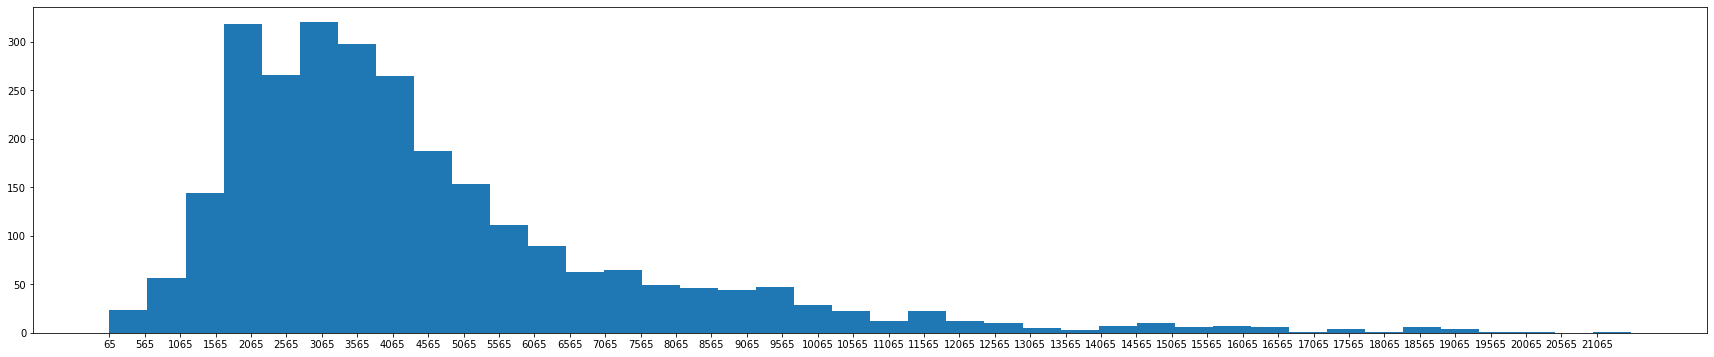

In [13]:
plt.figure(figsize=(30,6))
plt.hist(app_train["ElapsedTime(second)"], bins=40)
plt.xticks(range(min(app_train["ElapsedTime(second)"]), max(app_train["ElapsedTime(second)"])+1, 500))
plt.show()


In [14]:
app_train[app_train["ElapsedTime(second)"]<300]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
20,939,{'N47'},"{0, 'D'}",Sedo Analjezi,"Sünnet derisinin fazlal???, fimozis ve parafim...",0,MALE,ÜROLOJ? SERV?S?,11,4,166
331,2624,{'M25.5'},"{'B', 'C'}",Genel Anestezi,Eklem a?r?s?,57,FEMALE,ORTOPED? SERV?S?,40,13,97
611,290,{'I83.9'},"{0, 'E'}",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,44,FEMALE,GENEL KARMA CERRAH? SERV?S?,25,2,65
900,1198,{'K40.9'},{'C'},Spinal Anestezi,?nguinal herni,62,MALE,GENEL CERRAH? SERV?S?,47,9,101
1413,2032,{'N35'},{'C'},Spinal Anestezi,Üretra darl???,71,MALE,ÜROLOJ? SERV?S?,31,13,71
2097,930,{'N47'},"{0, 'D'}",Sedo Analjezi,"Sünnet derisinin fazlal???, fimozis ve parafim...",1,MALE,ÜROLOJ? SERV?S?,11,4,169
2505,937,{'N47'},"{0, 'D'}",Sedo Analjezi,"Sünnet derisinin fazlal???, fimozis ve parafim...",1,MALE,ÜROLOJ? SERV?S?,11,4,166
2661,1813,NaN,{'C'},NaN,NaN,51,MALE,ORTOPED? SERV?S?,17,14,82


In [15]:
app_train["SurgeryName"].value_counts()[-20:]

Safra kesesi ta??, akut kolesistit ile | Kolelitiazis, di?er                             1
Anal fissür, akut                                                                        1
Böbrek ta?? | Üreter ta??                                                                1
Gecikmi? dü?ük                                                                           1
L60,6                                                                                    1
Servikal disk bozukluklar?, di?er                                                        1
Metatarsal kemik k?r???                                                                  1
Testis ve epididimisin bozukluklar?, ba?ka yerde s?n?flanm?? hastal?klarda               1
Lumbago, siyatik ile                                                                     1
Tibia üst uç k?r???, kapal?                                                              1
Anüs ve rektal bölge fissür ve fistülü                                                   1

In [23]:
df.iloc[:,4].value_counts()

Tek tarafl? veya tan?mlanmam?? inguinal herni, gangrensiz veya obstrüksiyonsuz     29
Tek tarafl? veya tan?mlanmam?? inguinal herni, gangrensiz veya obstrüksiyonsuz     10
Name: SurgeryName, dtype: int64

In [19]:
df[df["SurgeryName"]=='Tek tarafl? veya tan?mlanmam?? inguinal herni, gangrensiz veya obstrüksiyonsuz ']

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)


In [20]:
df = train[train["SurgeryName"].str.contains('gangrensiz veya obstr', na=False)]
df

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
7,1087,"{nan, 'K40.9'}","{'B', 'C'}",Spinal Anestezi,"Tek tarafl? veya tan?mlanmam?? inguinal herni,...",56,MALE,GENEL CERRAH? SERV?S?,47,3,3520
16,372,{'K40.9'},{'C'},Spinal Anestezi,"Tek tarafl? veya tan?mlanmam?? inguinal herni,...",53,MALE,GENEL CERRAH? SERV?S?,36,7,3840
33,3622,{'K40.9'},{'C'},Spinal Anestezi,"Tek tarafl? veya tan?mlanmam?? inguinal herni,...",73,MALE,GENEL CERRAH? SERV?S?,36,11,3247
97,856,{'K40.9'},{'B'},Genel Anestezi,"Tek tarafl? veya tan?mlanmam?? inguinal herni,...",57,MALE,GENEL CERRAH? SERV?S?,36,10,7346
154,362,{'K40.9'},{'C'},Spinal Anestezi,"Tek tarafl? veya tan?mlanmam?? inguinal herni,...",61,MALE,GENEL CERRAH? SERV?S?,35,5,3033
374,453,{'K40.9'},{'C'},Spinal Anestezi,"Tek tarafl? veya tan?mlanmam?? inguinal herni,...",20,MALE,GENEL CERRAH? SERV?S?,33,5,3624
406,1096,{'K40.9'},{'C'},Spinal Anestezi,"Tek tarafl? veya tan?mlanmam?? inguinal herni,...",62,FEMALE,GENEL CERRAH? SERV?S?,47,3,3461
484,367,{'K40.9'},{'C'},Spinal Anestezi,"Tek tarafl? veya tan?mlanmam?? inguinal herni,...",39,MALE,GENEL CERRAH? SERV?S?,35,5,3359
567,689,"{'K40.9', 'N43.3'}",{'C'},Spinal Anestezi,"Tek tarafl? veya tan?mlanmam?? inguinal herni,...",28,MALE,GENEL CERRAH? SERV?S?,36,4,5305
592,712,"{nan, 'K40.3'}",{'B'},Spinal Anestezi,"Tek tarafl? veya tan?mlanmam?? inguinal herni,...",62,MALE,GENEL CERRAH? SERV?S?,5,13,3412


In [16]:
df = app_train[app_train["SurgeryName"].str.contains('Umbilikal', na=False)]
df

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
71,241,{'K42'},{'C'},Genel Anestezi,Umbilikal herni,36,MALE,GENEL CERRAH? SERV?S?,47,10,5330
145,1247,"{nan, 'K43.9', 'K42.0'}","{'D', 'C'}",Genel Anestezi,"Umbilikal herni, obstrüksiyonsuz, gangrenli",69,FEMALE,GENEL CERRAH? SERV?S?,36,13,7839
148,2446,{'K42.0'},{'C'},Genel Anestezi,"Umbilikal herni, gangrenli",30,FEMALE,GENEL CERRAH? SERV?S?,5,13,2839
155,961,"{'K42.1', nan}","{'B', 'C'}",Genel Anestezi,Umbilikal herni,61,MALE,GENEL CERRAH? SERV?S?,5,7,3320
211,2504,"{'K42.0', 'K80.8'}","{'B', 'C'}",Genel Anestezi,"Kolelitiazis, di?er | Umbilikal herni; obstrük...",57,MALE,GENEL CERRAH? SERV?S?,36,6,3124
248,1165,{'K42'},{'C'},Spinal Anestezi,Umbilikal herni,60,MALE,GENEL CERRAH? SERV?S?,36,4,4143
518,2194,{'K42.0'},"{'E', 'C'}",Genel Anestezi,Umbilikal herni,50,FEMALE,GENEL CERRAH? SERV?S?,47,13,3355
526,2157,"{nan, 'K42'}","{'B', 'C'}",Genel Anestezi,Umbilikal herni,51,MALE,GENEL CERRAH? SERV?S?,5,2,2988
572,3465,{'K42'},"{'D', 'C'}",Genel Anestezi,Umbilikal herni,53,FEMALE,GENEL CERRAH? SERV?S?,5,4,3030
601,2903,{'K42'},{'C'},Genel Anestezi,Umbilikal herni,36,FEMALE,GENEL CERRAH? SERV?S?,36,14,4849


In [18]:
train.iloc[df.SurgeryName.str.len().sort_values().index]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
71,241,{'K42'},{'C'},Genel Anestezi,Umbilikal herni,36,MALE,GENEL CERRAH? SERV?S?,47,10,5330
2126,3145,"{nan, 'K43.9', 'K42'}",{'C'},Genel Anestezi,Umbilikal herni,66,FEMALE,GENEL CERRAH? SERV?S?,36,11,3365
1996,3153,{'K42.0'},"{'D', 'C'}",Genel Anestezi,Umbilikal herni,56,MALE,GENEL CERRAH? SERV?S?,5,11,3097
1892,644,"{nan, 'K42'}","{'B', 'C'}",Genel Anestezi,Umbilikal herni,51,MALE,GENEL CERRAH? SERV?S?,33,10,4077
1808,924,{'K42'},{'C'},Genel Anestezi,Umbilikal herni,27,FEMALE,GENEL CERRAH? SERV?S?,44,12,3906
1706,650,"{nan, 'K42'}","{'B', 'C'}",Genel Anestezi,Umbilikal herni,48,FEMALE,GENEL CERRAH? SERV?S?,33,10,6180
1611,2154,"{nan, 'K42.0'}","{'B', 'C'}",Genel Anestezi,Umbilikal herni,51,MALE,GENEL CERRAH? SERV?S?,5,2,3296
1534,596,{'K42'},{'C'},Genel Anestezi,Umbilikal herni,28,MALE,GENEL CERRAH? SERV?S?,33,4,3123
1218,3163,{'K42.9'},{'C'},Genel Anestezi,Umbilikal herni,37,FEMALE,GENEL CERRAH? SERV?S?,47,15,4046
1190,2793,{'K42.0'},"{'B', 'C'}",Genel Anestezi,Umbilikal herni,41,MALE,GENEL CERRAH? SERV?S?,36,2,5722


In [79]:
train.iloc[df["ElapsedTime(second)"].sort_values().index]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
1037,3482,{'K42'},{'C'},Genel Anestezi,Umbilikal herni,38,MALE,GENEL CERRAH? SERV?S?,5,11,2417
2314,3359,"{'L30.8', 'M79.1', 'K42'}",{'C'},Genel Anestezi,Umbilikal herni,41,FEMALE,GENEL CERRAH? SERV?S?,29,4,2575
2686,42,NaN,"{'B', 'C'}",NaN,"Umbilikal herni; obstrüksiyonlu, gangrensiz",53,MALE,GENEL CERRAH? SERV?S?,5,6,2599
2146,3317,"{nan, 'K43.9', 'K42.0'}","{'B', 'C'}",Genel Anestezi,Umbilikal herni,19,FEMALE,GENEL CERRAH? SERV?S?,36,11,2605
1753,1370,{'K42'},{'C'},Genel Anestezi,"Umbilikal herni, gangrenli",69,MALE,GENEL CERRAH? SERV?S?,33,3,2776
148,2446,{'K42.0'},{'C'},Genel Anestezi,"Umbilikal herni, gangrenli",30,FEMALE,GENEL CERRAH? SERV?S?,5,13,2839
526,2157,"{nan, 'K42'}","{'B', 'C'}",Genel Anestezi,Umbilikal herni,51,MALE,GENEL CERRAH? SERV?S?,5,2,2988
572,3465,{'K42'},"{'D', 'C'}",Genel Anestezi,Umbilikal herni,53,FEMALE,GENEL CERRAH? SERV?S?,5,4,3030
1996,3153,{'K42.0'},"{'D', 'C'}",Genel Anestezi,Umbilikal herni,56,MALE,GENEL CERRAH? SERV?S?,5,11,3097
1534,596,{'K42'},{'C'},Genel Anestezi,Umbilikal herni,28,MALE,GENEL CERRAH? SERV?S?,33,4,3123


In [80]:
df2 = train[train["SurgeryName"].str.contains('Mesane', na=False)]
df2

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
10,1433,{'Z12.6'},"{'B', 'A3'}",Spinal Anestezi,Mesane neoplazm? için özel tarama muayenesi,53,MALE,ÜROLOJ? SERV?S?,26,3,8310
31,315,"{'N40', 'N21.0'}",{'B'},Genel Anestezi,Mesane ta??,50,MALE,ÜROLOJ? SERV?S?,31,10,6375
163,1365,{'N31.9'},{'D'},Spinal Anestezi,"Mesanenin nöromusküler disfonksiyonu, tan?mlan...",44,FEMALE,ÜROLOJ? SERV?S?,26,3,2299
210,2315,{'N21.0'},"{0, 'B', 'C'}",Spinal Anestezi,Mesane ta??,55,MALE,ÜROLOJ? SERV?S?,31,11,7211
238,1433,{'Z12.6'},"{'B', 'A3'}",Spinal Anestezi,Mesane neoplazm? için özel tarama muayenesi,53,MALE,ÜROLOJ? SERV?S?,26,3,8310
588,244,"{'K21.9', 'N20.2', 'N30.0', 'N21.0'}",{'B'},Spinal Anestezi,Mesane ta??,53,MALE,ÜROLOJ? SERV?S?,15,2,5898
634,2865,"{'N21.0', 'N23'}",{'B'},Spinal Anestezi,Mesane ta??,49,MALE,ÜROLOJ? SERV?S?,27,14,2758
1044,955,{'C67.9'},{'A3'},Spinal Anestezi,"Mesane malign neoplazm?, tan?mlanmam??",60,FEMALE,ÜROLOJ? SERV?S?,27,7,2103
1093,1479,"{nan, 'C67.9', 'N40'}",{0},Sedo Analjezi,"Mesane malign neoplazm?, tan?mlanmam??",48,MALE,ÜROLOJ? SERV?S?,31,14,6639
1122,850,"{'R31', 'C67.9'}",{'A3'},Spinal Anestezi,"Mesane malign neoplazm?, tan?mlanmam?? | Hemat...",33,MALE,ÜROLOJ? SERV?S?,27,7,2438


In [ ]:
train.iloc[df2["ElapsedTime(second)"].sort_values().index]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
2744,1757,NaN,{0},NaN,"Mesane malign neoplazm?, tan?mlanmam??",34,MALE,ÜROLOJ? SERV?S?,27,6,1432
2566,720,{'N30.0'},{'C'},Sedo Analjezi,Mesane benign neoplazm?,44,FEMALE,ÜROLOJ? SERV?S?,11,12,1640
2770,1755,NaN,{0},NaN,"Mesane malign neoplazm?, tan?mlanmam??",56,MALE,ÜROLOJ? SERV?S?,27,6,1813
1044,955,{'C67.9'},{'A3'},Spinal Anestezi,"Mesane malign neoplazm?, tan?mlanmam??",60,FEMALE,ÜROLOJ? SERV?S?,27,7,2103
2750,3243,NaN,{0},NaN,"Mesane malign neoplazm?, tan?mlanmam??",68,MALE,ÜROLOJ? SERV?S?,27,12,2152
163,1365,{'N31.9'},{'D'},Spinal Anestezi,"Mesanenin nöromusküler disfonksiyonu, tan?mlan...",44,FEMALE,ÜROLOJ? SERV?S?,26,3,2299
1122,850,"{'R31', 'C67.9'}",{'A3'},Spinal Anestezi,"Mesane malign neoplazm?, tan?mlanmam?? | Hemat...",33,MALE,ÜROLOJ? SERV?S?,27,7,2438
1772,987,{'N32.9'},{'C'},Genel Anestezi,"Mesane bozuklu?u, tan?mlanmam??",44,FEMALE,ÜROLOJ? SERV?S?,11,12,2494
2373,987,{'N32.9'},{'C'},Genel Anestezi,"Mesane bozuklu?u, tan?mlanmam??",44,FEMALE,ÜROLOJ? SERV?S?,11,12,2498
2628,3461,NaN,{0},NaN,Mesane ta??,49,MALE,ÜROLOJ? SERV?S?,27,12,2514


In [10]:
train[train["ID"]==3228]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
92,3228,"{'K21.9', 'J15.9', 'N30.0', 'N21.1', 'N30.9', ...",{'B'},Spinal Anestezi,Üretra ta??,68,MALE,ÜROLOJ? SERV?S?,15,2,4581


In [22]:
train['DiagnosticICD10Code'].str.len().value_counts()

9.0     1258
7.0      471
14.0     320
12.0     119
18.0     105
23.0      63
16.0      48
27.0      42
36.0      33
25.0      27
32.0      21
34.0      15
10.0      14
21.0      12
30.0      11
24.0      10
33.0       5
17.0       4
43.0       3
41.0       3
45.0       2
22.0       2
19.0       2
28.0       2
15.0       2
42.0       2
26.0       2
40.0       1
79.0       1
50.0       1
Name: DiagnosticICD10Code, dtype: int64

<AxesSubplot:xlabel='ElapsedTime(second)', ylabel='Count'>

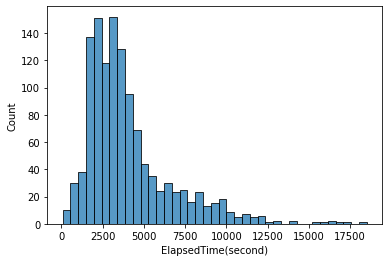

In [19]:
df = app_train[app_train['DiagnosticICD10Code'].str.len()==9]
sns.histplot(df["ElapsedTime(second)"])


<AxesSubplot:xlabel='ElapsedTime(second)', ylabel='Count'>

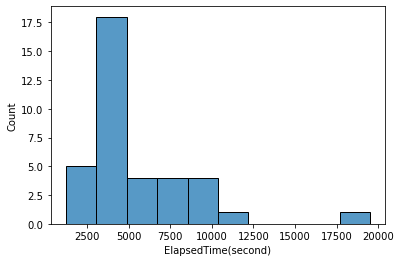

In [20]:
df = app_train[app_train['DiagnosticICD10Code'].str.len()==27]
sns.histplot(df["ElapsedTime(second)"])


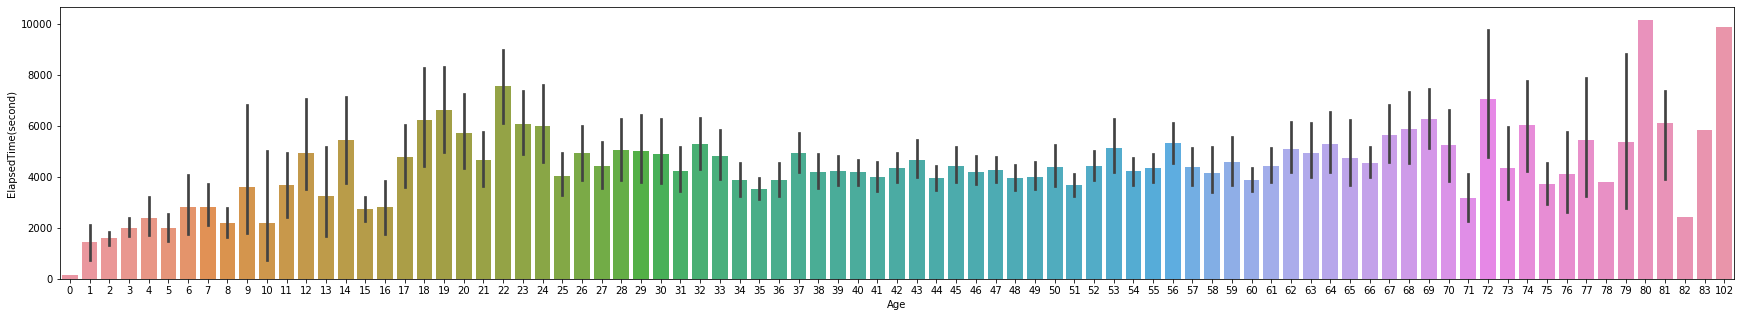

In [3]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=train["Age"], y="ElapsedTime(second)", data=train)
plt.show()


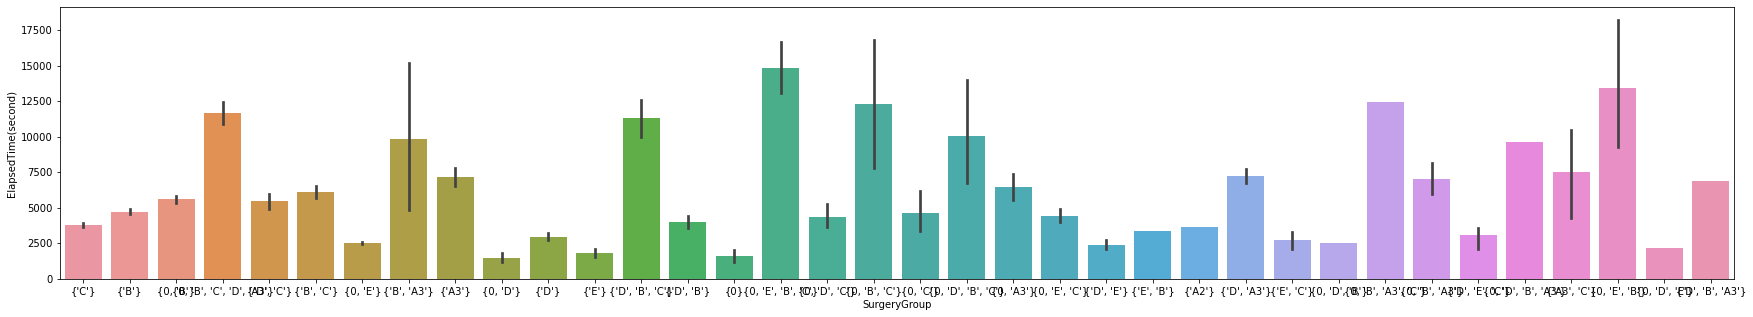

In [21]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=app_train["SurgeryGroup"], y="ElapsedTime(second)", data=app_train)
plt.show()


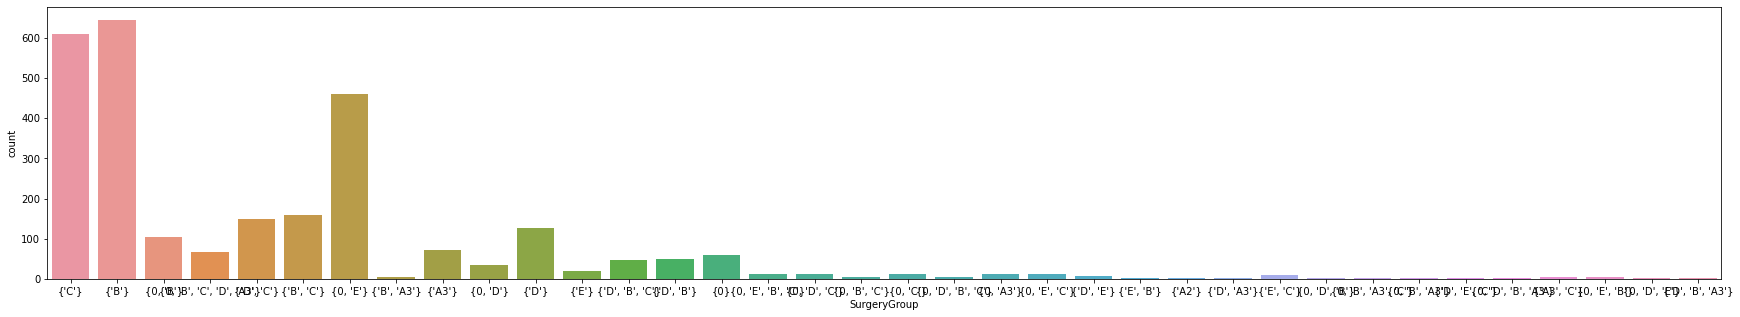

In [24]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.countplot(x=app_train["SurgeryGroup"], data=app_train)
plt.show()


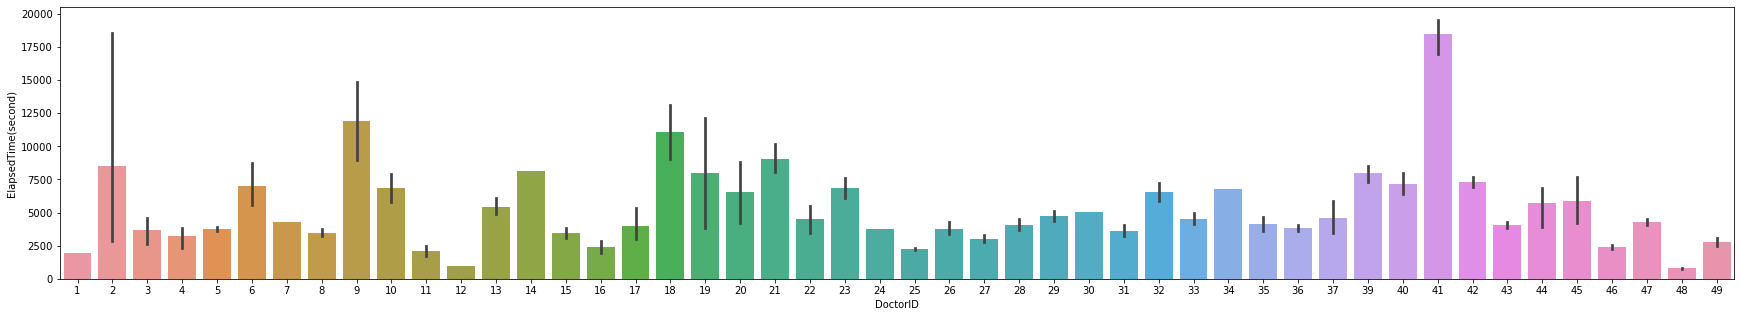

In [25]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=app_train["DoctorID"], y="ElapsedTime(second)", data=app_train)
plt.show()


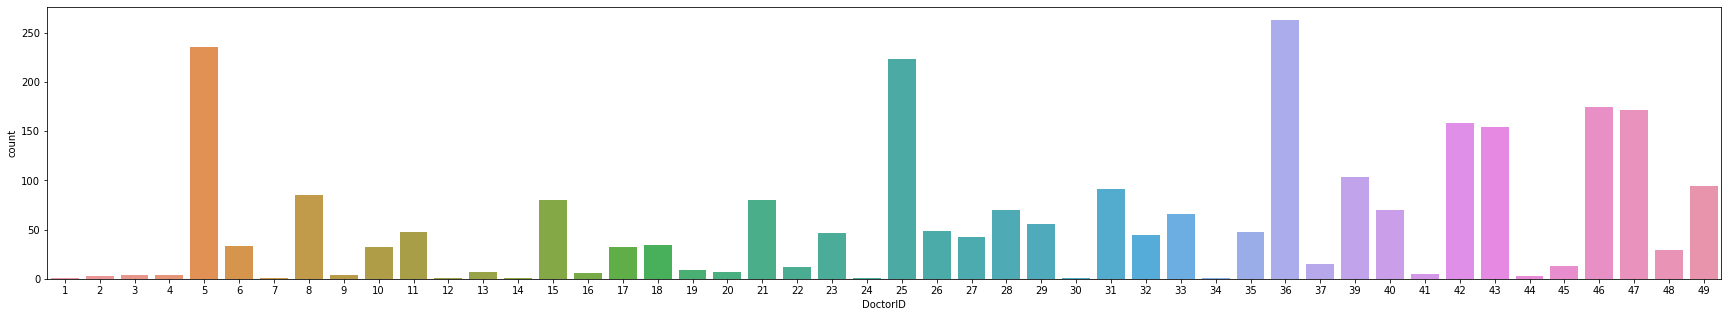

In [26]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.countplot(x=app_train["DoctorID"], data=app_train)
plt.show()


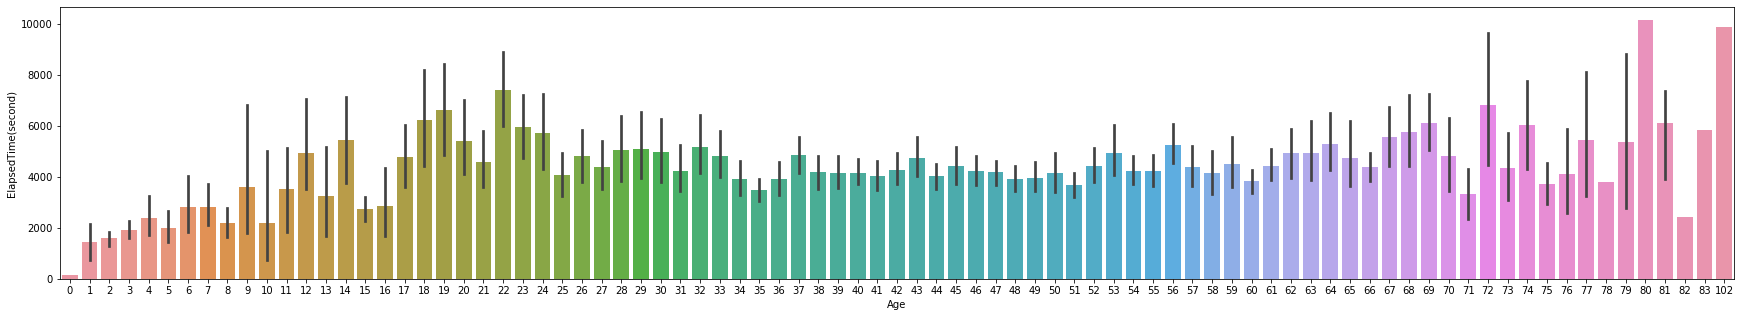

In [27]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=app_train["Age"], y="ElapsedTime(second)", data=app_train)
plt.show()


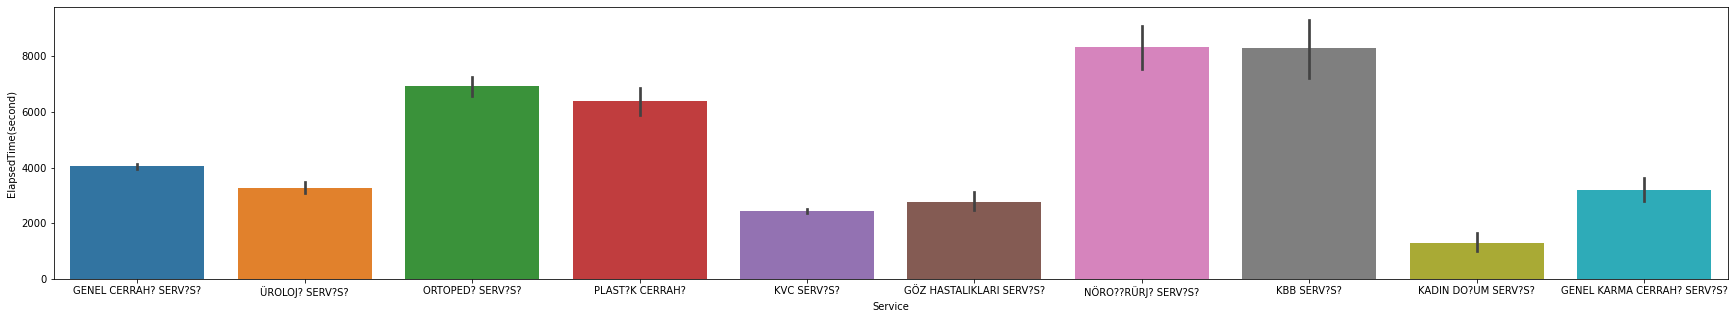

In [28]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=app_train["Service"], y="ElapsedTime(second)", data=app_train)
plt.show()


In [29]:
app_train[app_train["AnesthesiaType"]=='Epidural ve Genel Anestezi']

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
68,3481,"{nan, 'K40'}","{'B', 'C'}",Epidural ve Genel Anestezi,?nguinal herni,56,MALE,GENEL CERRAH? SERV?S?,5,11,5219
192,3022,{'N20.1'},"{'D', 'B', 'C'}",Epidural ve Genel Anestezi,Üreter ta??,43,FEMALE,ÜROLOJ? SERV?S?,31,2,3178
314,3150,"{'Z01.1', 'J35.2', 'H65.2'}",{'C'},Epidural ve Genel Anestezi,Kulak ve i?itme muayenesi,11,MALE,KBB SERV?S?,6,11,4234
419,2636,{'K42.0'},{'C'},Epidural ve Genel Anestezi,NaN,50,FEMALE,GENEL CERRAH? SERV?S?,36,6,2761
581,2800,"{nan, 'M51.0'}","{0, 'B'}",Epidural ve Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,46,FEMALE,NÖRO??RÜRJ? SERV?S?,21,6,7069
1975,2337,"{nan, 'M25.5'}","{'B', 'C'}",Epidural ve Genel Anestezi,Eklem a?r?s?,17,FEMALE,ORTOPED? SERV?S?,10,12,7514
2192,2963,"{nan, 'J34.2'}","{0, 'E', 'C'}",Epidural ve Genel Anestezi,Nazal septum deviasyonu,40,MALE,KBB SERV?S?,6,2,4208
2395,2964,{'M95.0'},{'C'},Epidural ve Genel Anestezi,Burnun kazan?lm?? deformitesi,20,FEMALE,PLAST?K CERRAH?,39,2,11328


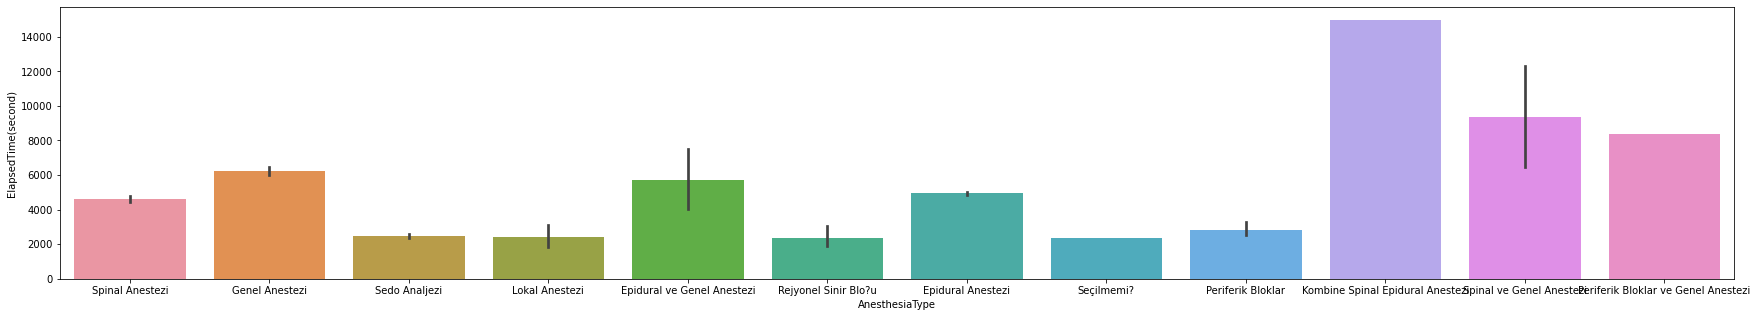

In [30]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x="AnesthesiaType", y="ElapsedTime(second)", data=app_train)
plt.show()


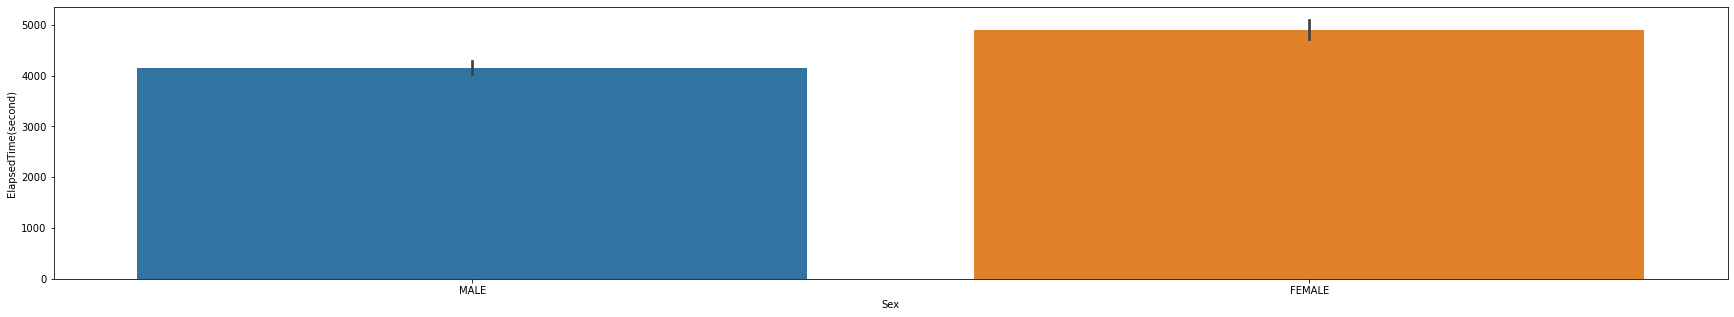

In [31]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x="Sex", y="ElapsedTime(second)", data=app_train)
plt.show()


In [34]:
df = app_train[app_train["DiagnosticICD10Code"].str.contains('M', na=False)]
df

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
3,1059,"{nan, 'M51.1'}","{0, 'B'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871
4,608,"{'M51.1', nan, 'M48.0'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046
5,1895,{'M95.0'},"{'D', 'C'}",Genel Anestezi,Burnun kazan?lm?? deformitesi,33,MALE,PLAST?K CERRAH?,39,13,11146
9,208,{'M54.5'},"{0, 'B'}",Genel Anestezi,NaN,18,FEMALE,ORTOPED? SERV?S?,21,10,6246
13,2544,"{nan, 'K21', 'M17.9', 'I87.2'}","{'B', 'C'}",Spinal Anestezi,"Gonartroz, tan?mlanmam??",58,FEMALE,ORTOPED? SERV?S?,32,13,6567
...,...,...,...,...,...,...,...,...,...,...,...
2541,2182,"{nan, 'K21.0', 'M17.9', 'I87.2'}","{'B', 'C'}",Spinal Anestezi,"Gonartroz, tan?mlanmam??",52,FEMALE,ORTOPED? SERV?S?,32,11,6988
2549,2394,"{nan, 'M51.1'}","{0, 'B'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,40,MALE,ORTOPED? SERV?S?,21,11,6746
2568,434,"{'M50.1', 'M54.2'}",{'A3'},Genel Anestezi,NaN,56,FEMALE,ORTOPED? SERV?S?,42,1,8454
2576,826,"{nan, 'M17.1'}","{'B', 'C'}",Genel Anestezi,"Primer gonartroz, di?er",63,FEMALE,ORTOPED? SERV?S?,10,12,10727


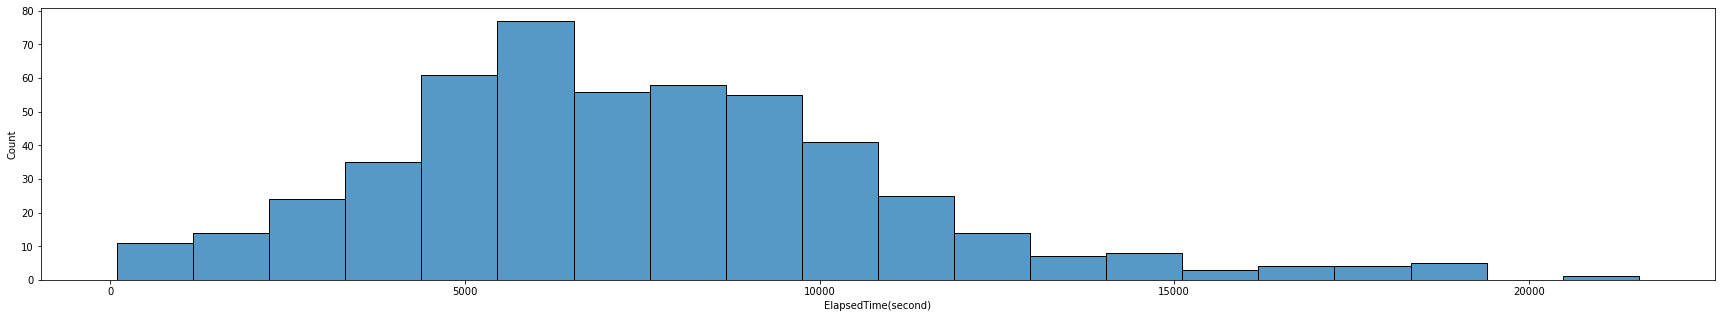

In [35]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.histplot(x="ElapsedTime(second)", data=df)
plt.show()


In [36]:
df = app_train[app_train["SurgeryGroup"].str.contains('A', na=False)]
df

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
4,608,"{'M51.1', nan, 'M48.0'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046
10,1433,{'Z12.6'},"{'B', 'A3'}",Spinal Anestezi,Mesane neoplazm? için özel tarama muayenesi,53,MALE,ÜROLOJ? SERV?S?,26,3,8310
18,2180,{'M50.1'},{'A3'},Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",56,MALE,ORTOPED? SERV?S?,42,11,8001
42,2529,{'M50.1'},{'A3'},Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",43,FEMALE,NÖRO??RÜRJ? SERV?S?,42,2,9140
43,3014,"{'M50.1', 'Z00.0', 'E03.9'}",{'A3'},Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",44,FEMALE,NÖRO??RÜRJ? SERV?S?,42,6,9818
52,213,"{nan, 'M51.1'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,"Spinal stenoz, lomber bölge",28,FEMALE,ORTOPED? SERV?S?,42,2,13352
131,3314,"{nan, 'M51.1', 'M43.1', 'M48.06', 'I10'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,70,FEMALE,NÖRO??RÜRJ? SERV?S?,42,2,9632
135,199,"{'M54.5', nan, 'M48.0', 'M51.8'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,"Spinal stenoz, lomber bölge",53,FEMALE,ORTOPED? SERV?S?,21,4,21550
138,3670,"{nan, 'G59', 'F32.8', 'M51.1'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,69,FEMALE,NÖRO??RÜRJ? SERV?S?,42,12,11861
139,2638,"{nan, 'M51.1'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,52,MALE,NÖRO??RÜRJ? SERV?S?,42,11,9327


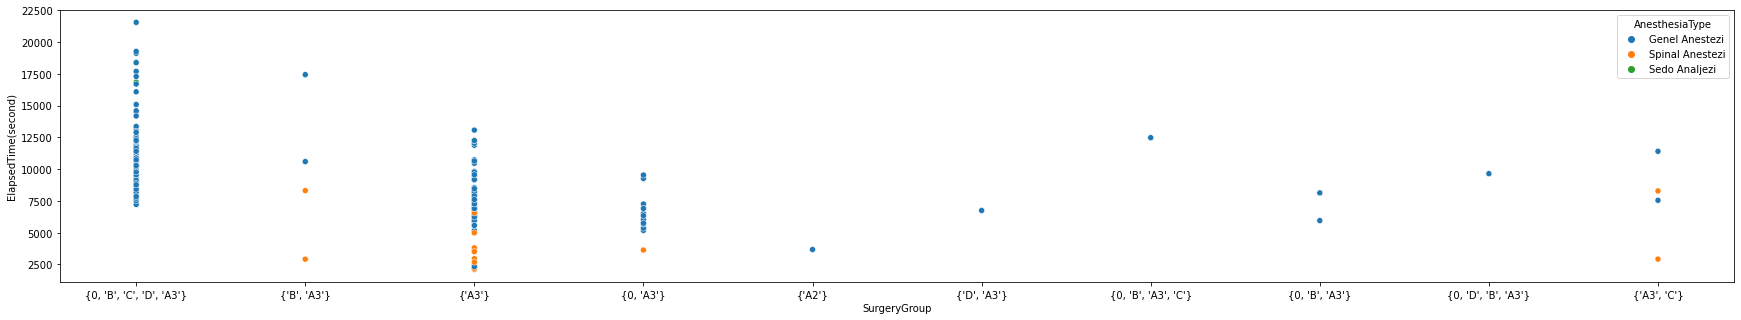

In [42]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.scatterplot(x="SurgeryGroup", y= "ElapsedTime(second)", hue="AnesthesiaType", data=df, )
plt.show()


In [21]:
app_train_clean = app_train.copy()
app_train_clean["DiagnosticICD10Code"] = app_train_clean["DiagnosticICD10Code"].str[1:-1]
app_train_clean["DiagnosticICD10Code"] = app_train_clean["DiagnosticICD10Code"].str.replace("'","")
app_train_clean["SurgeryGroup"] = app_train_clean["SurgeryGroup"].str[1:-1]
app_train_clean["SurgeryGroup"] = app_train_clean["SurgeryGroup"].str.replace("'","")
app_train_clean.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
0,1829,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333
1,1104,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972
2,1850,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647
3,1059,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871
4,608,"M51.1, nan, M48.0","0, B, C, D, A3",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046


In [84]:
app_test_clean = app_test.copy()
app_test_clean["DiagnosticICD10Code"] = app_test_clean["DiagnosticICD10Code"].str[1:-1]
app_test_clean["DiagnosticICD10Code"] = app_test_clean["DiagnosticICD10Code"].str.replace("'","")
app_test_clean["SurgeryGroup"] = app_test_clean["SurgeryGroup"].str[1:-1]
app_test_clean["SurgeryGroup"] = app_test_clean["SurgeryGroup"].str.replace("'","")
app_test_clean.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID
0,1669,H26.9,C,Sedo Analjezi,NaN,70,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,13
1,2091,L05.9,C,Spinal Anestezi,Pilonidal kist,41,MALE,GENEL CERRAH? SERV?S?,36,6
2,585,M50.1,A3,Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",59,FEMALE,ORTOPED? SERV?S?,42,14
3,1455,S42.2,B,Genel Anestezi,Humerus üst uç k?r???,54,FEMALE,ORTOPED? SERV?S?,23,14
4,1801,I82,"0, E",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,50,MALE,KVC SERV?S?,46,13


In [22]:
app_train_clean['Any_NaN_Diagnos'] = app_train_clean['DiagnosticICD10Code'].apply(lambda x: 1 if 'nan,' in str(x) else 0)


In [85]:
app_test_clean['Any_NaN_Diagnos'] = app_test_clean['DiagnosticICD10Code'].apply(lambda x: 1 if 'nan,' in str(x) else 0)


In [24]:
def clean_diagnosis(diagnosis):
    if isinstance(diagnosis, str):
        return set(diagnosis.replace(', nan', '').replace(' nan,', '').replace('nan,', '').replace(' ', '').split(','))
    else:
        return diagnosis

app_train_clean['Diagnos_Clean'] = app_train_clean['DiagnosticICD10Code'].apply(clean_diagnosis)
app_test_clean['Diagnos_Clean'] = app_test_clean['DiagnosticICD10Code'].apply(clean_diagnosis)

In [25]:
app_train_clean.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean
0,1829,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333,0,{L05}
1,1104,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972,0,{N20.1}
2,1850,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647,0,{K80.8}
3,1059,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871,1,{M51.1}
4,608,"M51.1, nan, M48.0","0, B, C, D, A3",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046,1,"{M51.1, M48.0}"


In [66]:
app_test_clean.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,Any_NaN_Diagnos,Diagnos_Clean
0,1669,H26.9,C,Sedo Analjezi,NaN,70,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,13,0,{H26.9}
1,2091,L05.9,C,Spinal Anestezi,Pilonidal kist,41,MALE,GENEL CERRAH? SERV?S?,36,6,0,{L05.9}
2,585,M50.1,A3,Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",59,FEMALE,ORTOPED? SERV?S?,42,14,0,{M50.1}
3,1455,S42.2,B,Genel Anestezi,Humerus üst uç k?r???,54,FEMALE,ORTOPED? SERV?S?,23,14,0,{S42.2}
4,1801,I82,"0, E",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,50,MALE,KVC SERV?S?,46,13,0,{I82}


In [27]:
app_train_clean.Any_NaN_Diagnos.value_counts()

0    2261
1     453
Name: Any_NaN_Diagnos, dtype: int64

In [87]:
app_test_clean.Any_NaN_Diagnos.value_counts()

0    994
1    217
Name: Any_NaN_Diagnos, dtype: int64

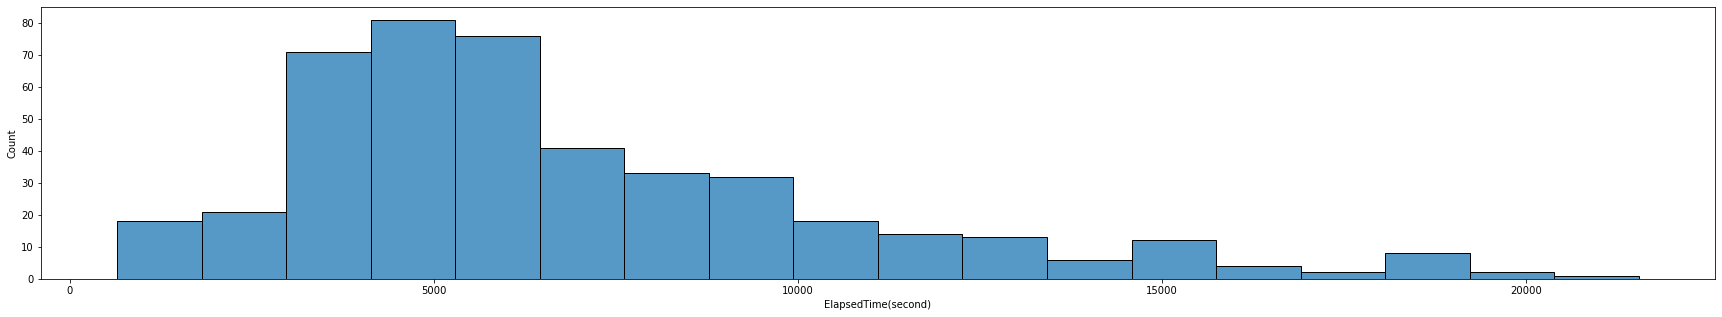

In [49]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.histplot(x="ElapsedTime(second)", data=app_train_clean[app_train_clean["Any_NaN_Diagnos"]==1])
plt.show()


In [88]:
map_dict = {'0': 1, 'E': 1, 'D': 2, 'C': 3, 'B': 4, 'A3': 5, 'A2': 6, 'A1': 7}

In [30]:
mapper = lambda x: [map_dict[val.strip()] for val in x.split(',')]

In [31]:
app_train_clean["SurgeryGroup_Encode"] = app_train_clean["SurgeryGroup"].apply(mapper)

In [89]:
app_test_clean["SurgeryGroup_Encode"] = app_test_clean["SurgeryGroup"].apply(mapper)

In [34]:
app_train_clean.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode
0,1829,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333,0,{L05},[3]
1,1104,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972,0,{N20.1},[3]
2,1850,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647,0,{K80.8},[4]
3,1059,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871,1,{M51.1},"[1, 4]"
4,608,"M51.1, nan, M48.0","0, B, C, D, A3",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046,1,"{M51.1, M48.0}","[1, 4, 3, 2, 5]"


In [90]:
app_test_clean.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode
0,1669,H26.9,C,Sedo Analjezi,NaN,70,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,13,0,{H26.9},[3]
1,2091,L05.9,C,Spinal Anestezi,Pilonidal kist,41,MALE,GENEL CERRAH? SERV?S?,36,6,0,{L05.9},[3]
2,585,M50.1,A3,Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",59,FEMALE,ORTOPED? SERV?S?,42,14,0,{M50.1},[5]
3,1455,S42.2,B,Genel Anestezi,Humerus üst uç k?r???,54,FEMALE,ORTOPED? SERV?S?,23,14,0,{S42.2},[4]
4,1801,I82,"0, E",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,50,MALE,KVC SERV?S?,46,13,0,{I82},"[1, 1]"


In [35]:
app_train_clean["SurgeryGroup_Sum"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.sum(x))
app_train_clean["SurgeryGroup_Count"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: len(x))
app_train_clean["SurgeryGroup_Avg"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.mean(x))
app_train_clean["SurgeryGroup_Std"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.std(x))
app_train_clean["SurgeryGroup_Max"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.max(x))
app_train_clean["SurgeryGroup_Min"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.min(x))
app_train_clean.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min
0,1829,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333,0,{L05},[3],3,1,3.0,0.000000,3,3
1,1104,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972,0,{N20.1},[3],3,1,3.0,0.000000,3,3
2,1850,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647,0,{K80.8},[4],4,1,4.0,0.000000,4,4
3,1059,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871,1,{M51.1},"[1, 4]",5,2,2.5,1.500000,4,1
4,608,"M51.1, nan, M48.0","0, B, C, D, A3",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046,1,"{M51.1, M48.0}","[1, 4, 3, 2, 5]",15,5,3.0,1.414214,5,1


In [91]:
app_test_clean["SurgeryGroup_Sum"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.sum(x))
app_test_clean["SurgeryGroup_Count"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: len(x))
app_test_clean["SurgeryGroup_Avg"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.mean(x))
app_test_clean["SurgeryGroup_Std"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.std(x))
app_test_clean["SurgeryGroup_Max"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.max(x))
app_test_clean["SurgeryGroup_Min"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.min(x))
app_test_clean.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min
0,1669,H26.9,C,Sedo Analjezi,NaN,70,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,13,0,{H26.9},[3],3,1,3.0,0.0,3,3
1,2091,L05.9,C,Spinal Anestezi,Pilonidal kist,41,MALE,GENEL CERRAH? SERV?S?,36,6,0,{L05.9},[3],3,1,3.0,0.0,3,3
2,585,M50.1,A3,Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",59,FEMALE,ORTOPED? SERV?S?,42,14,0,{M50.1},[5],5,1,5.0,0.0,5,5
3,1455,S42.2,B,Genel Anestezi,Humerus üst uç k?r???,54,FEMALE,ORTOPED? SERV?S?,23,14,0,{S42.2},[4],4,1,4.0,0.0,4,4
4,1801,I82,"0, E",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,50,MALE,KVC SERV?S?,46,13,0,{I82},"[1, 1]",2,2,1.0,0.0,1,1


In [44]:
app_train_clean[app_train_clean["Diagnos_Clean"].isna()==True][:15]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min
2601,761,NaN,B,NaN,"Gövdenin lokalize ?i?me, kitle ve yumrusu",44,MALE,PLAST?K CERRAH?,28,9,2415,0,NaN,[4],4,1,4.0,0.000000,4,4
2602,1504,NaN,B,NaN,Anal polip,58,MALE,GENEL CERRAH? SERV?S?,36,14,2863,0,NaN,[4],4,1,4.0,0.000000,4,4
2603,1838,NaN,C,NaN,"Di?er iç yerle?im bozukluklar?, medial kollate...",21,FEMALE,ORTOPED? SERV?S?,23,11,4182,0,NaN,[3],3,1,3.0,0.000000,3,3
2604,118,NaN,B,NaN,Benign prostat hiperplazisi,69,MALE,ÜROLOJ? SERV?S?,11,9,3966,0,NaN,[4],4,1,4.0,0.000000,4,4
2605,6,NaN,"B, C",NaN,"Bilateral inguinal herni; obstrüksiyonlu, gang...",44,MALE,GENEL CERRAH? SERV?S?,5,4,3738,0,NaN,"[4, 3]",7,2,3.5,0.500000,4,3
2606,89,NaN,"D, B, C",NaN,Omuz rotator cuff tendon yaralanmas?,61,FEMALE,ORTOPED? SERV?S?,23,1,8672,0,NaN,"[2, 4, 3]",9,3,3.0,0.816497,4,2
2607,57,NaN,"0, E",NaN,"Alt ekstremitenin variköz venleri, enflamasyon...",31,FEMALE,GENEL KARMA CERRAH? SERV?S?,8,2,1426,0,NaN,"[1, 1]",2,2,1.0,0.000000,1,1
2608,106,NaN,"B, C",NaN,?nguinal herni,56,MALE,GENEL CERRAH? SERV?S?,5,7,5627,0,NaN,"[4, 3]",7,2,3.5,0.500000,4,3
2609,33,NaN,C,NaN,Pilonidal kist,22,FEMALE,GENEL CERRAH? SERV?S?,43,3,3440,0,NaN,[3],3,1,3.0,0.000000,3,3
2610,2129,NaN,C,NaN,"Di?er iç yerle?im bozukluklar?, medial kollate...",46,MALE,ORTOPED? SERV?S?,23,2,4052,0,NaN,[3],3,1,3.0,0.000000,3,3


In [92]:
app_test_clean[app_test_clean["Diagnos_Clean"].isna()==True][:15]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min
1116,81,NaN,B,NaN,NaN,18,FEMALE,GENEL CERRAH? SERV?S?,5,6,0,NaN,[4],4,1,4.0,0.0,4,4
1117,994,NaN,D,NaN,Blefaro?alazis,63,FEMALE,PLAST?K CERRAH?,28,14,0,NaN,[2],2,1,2.0,0.0,2,2
1118,2233,NaN,"D, C",NaN,"Derinin ve subkutanöz dokunun lokalize ?i?me, ...",49,MALE,PLAST?K CERRAH?,28,14,0,NaN,"[2, 3]",5,2,2.5,0.5,3,2
1119,128,NaN,A3,NaN,"Gastro-özofajial reflü hastal???, özofajit ile",36,FEMALE,GENEL CERRAH? SERV?S?,35,4,0,NaN,[5],5,1,5.0,0.0,5,5
1120,1956,NaN,B,NaN,"Ba??n lokalize ?i?me, kitle ve yumrusu",44,FEMALE,GENEL CERRAH? SERV?S?,36,11,0,NaN,[4],4,1,4.0,0.0,4,4
1121,1086,NaN,B,NaN,Ganglion,56,FEMALE,ORTOPED? SERV?S?,40,1,0,NaN,[4],4,1,4.0,0.0,4,4
1122,111,NaN,"0, B",NaN,Lumbar ve di?er intervertebral disk bozuklukla...,66,MALE,ORTOPED? SERV?S?,42,4,0,NaN,"[1, 4]",5,2,2.5,1.5,4,1
1123,2055,NaN,"B, C",NaN,Di?er tan?mlanm?? eklem bozukluklar?,26,MALE,ORTOPED? SERV?S?,40,11,0,NaN,"[4, 3]",7,2,3.5,0.5,4,3
1124,1012,NaN,B,NaN,"Alt ekstremitenin lokalize ?i?me, kitle ve yum...",51,MALE,GENEL CERRAH? SERV?S?,43,3,0,NaN,[4],4,1,4.0,0.0,4,4
1125,78,NaN,B,NaN,NaN,47,FEMALE,GENEL CERRAH? SERV?S?,5,6,0,NaN,[4],4,1,4.0,0.0,4,4


## do max-min-mean-count too

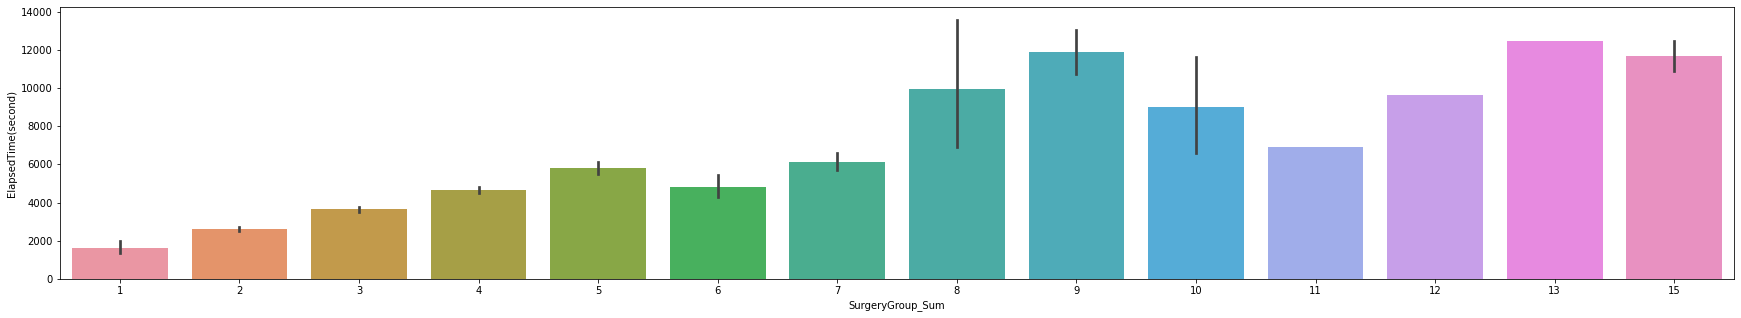

In [56]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x="SurgeryGroup_Sum", y="ElapsedTime(second)", data=app_train_clean)
plt.show()


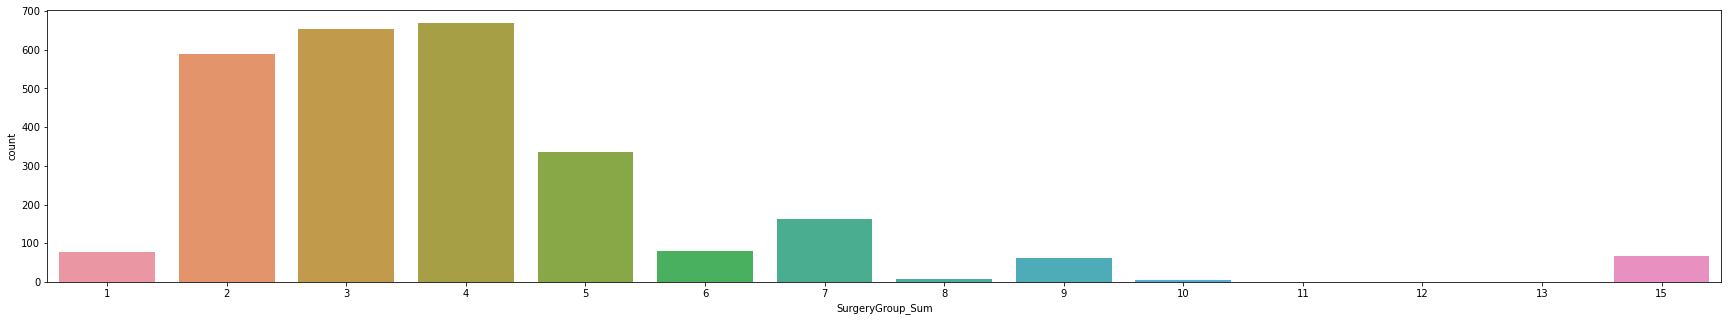

In [57]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.countplot(x="SurgeryGroup_Sum", data=app_train_clean)
plt.show()


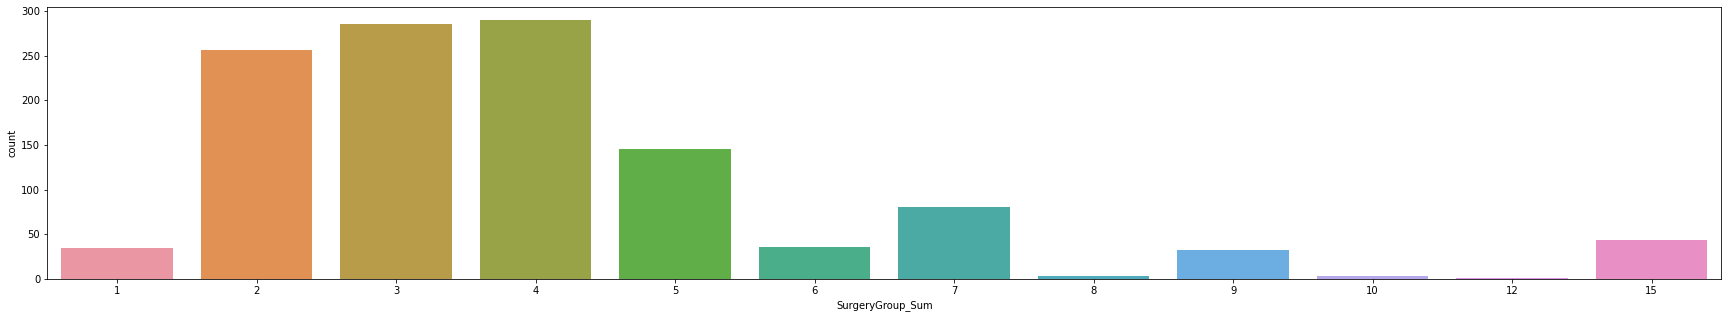

In [93]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.countplot(x="SurgeryGroup_Sum", data=app_test_clean)
plt.show()


In [135]:
train.iloc[train.DiagnosticICD10Code.str.len().sort_values(ascending=False).index][:20]


,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
92,3228,"{'K21.9', 'J15.9', 'N30.0', 'N21.1', 'N30.9', ...",{'B'},Spinal Anestezi,Üretra ta??,68,MALE,ÜROLOJ? SERV?S?,15,2,4581
2014,245,"{'K21.9', 'J15.9', 'R31', 'N30.0', 'M19.9', 'I...",{'C'},Spinal Anestezi,NaN,71,MALE,ÜROLOJ? SERV?S?,15,2,5415
651,448,"{'K21.9', 'J15.9', 'N20.0', 'N20.1', 'M19.9'}",{'B'},Genel Anestezi,Üreter ta??,30,MALE,ÜROLOJ? SERV?S?,15,9,3260
725,403,"{'K21.9', 'J15.9', 'N30.2', 'N20.0', 'M19.9'}",{'C'},Genel Anestezi,"Kronik sistitler, di?er",49,FEMALE,ÜROLOJ? SERV?S?,15,5,2710
622,1105,"{'K21.9', 'N30.2', 'R31', 'N30.0', 'M19.9'}",{'B'},Spinal Anestezi,NaN,47,FEMALE,ÜROLOJ? SERV?S?,15,3,6159
415,3710,"{'K80.8', 'L30', 'K29.1', 'M79.9', 'M79.1'}",{'B'},Genel Anestezi,"Kolesistitler, di?er",51,FEMALE,GENEL CERRAH? SERV?S?,29,6,6351
2094,1105,"{'K21.9', 'N30.2', 'R31', 'N30.0', 'M19.9'}",{'B'},Spinal Anestezi,NaN,47,FEMALE,ÜROLOJ? SERV?S?,15,3,6163
2295,1475,"{nan, 'M51.1', 'M43.1', 'M48.06', 'K29.1'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,67,FEMALE,ORTOPED? SERV?S?,42,13,10280
198,889,"{nan, 'M51.1', 'M54.5', 'M43.1', 'M48.06'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Bel a?r?s?,43,FEMALE,ORTOPED? SERV?S?,42,3,8649
251,2514,"{nan, 'K80.8', 'L30.8', 'K29.1', 'M79.1'}","{'D', 'B'}",Genel Anestezi,"Kolelitiazis, di?er",50,FEMALE,GENEL CERRAH? SERV?S?,29,12,5006


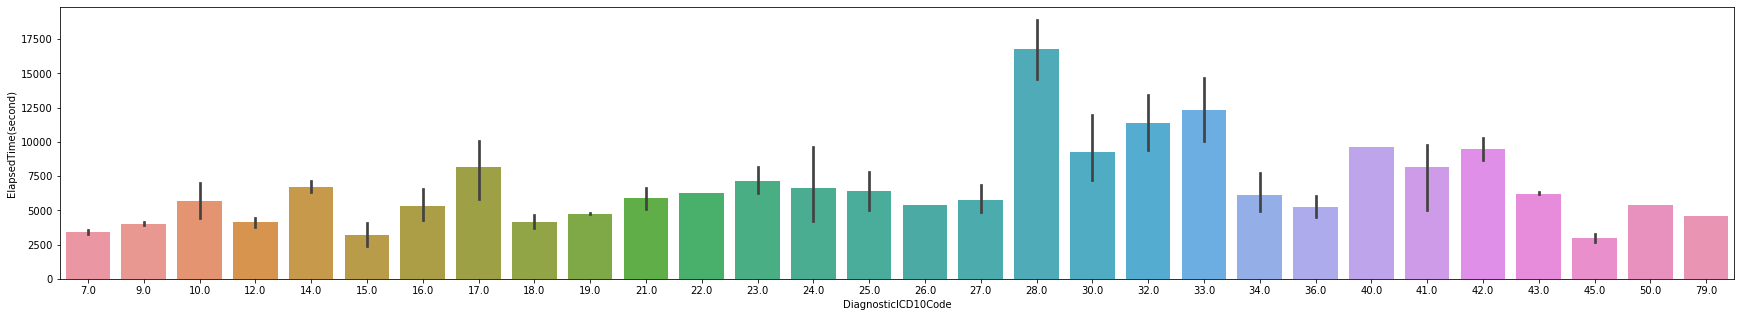

In [59]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=train["DiagnosticICD10Code"].str.len(), y="ElapsedTime(second)", data=train)
plt.show()

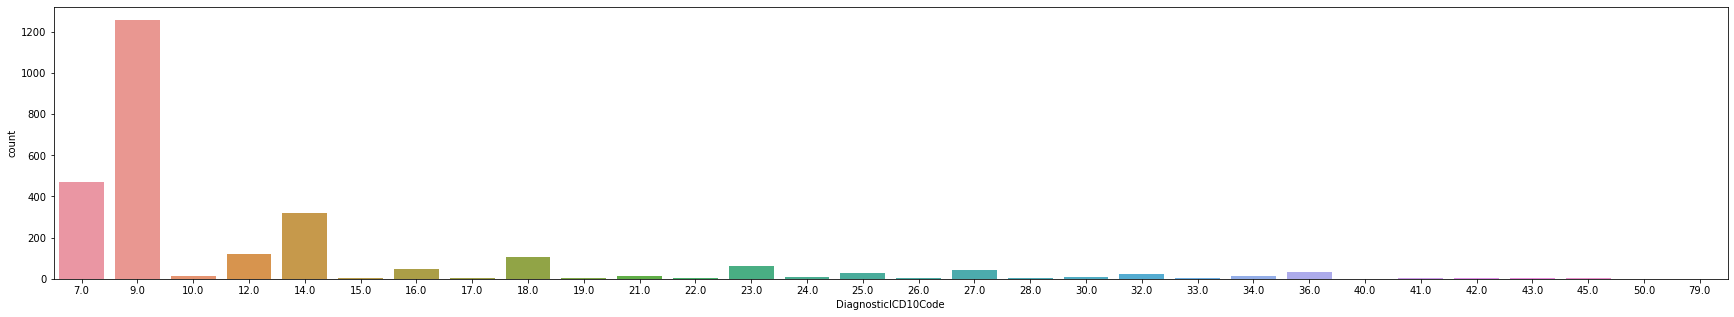

In [60]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.countplot(x=train["DiagnosticICD10Code"].str.len(), data=train)
plt.show()

In [46]:
app_train_clean[app_train_clean["ID"]==3228]


,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min
92,3228,"K21.9, J15.9, N30.0, N21.1, N30.9, L30.3, N40,...",B,Spinal Anestezi,Üretra ta??,68,MALE,ÜROLOJ? SERV?S?,15,2,4581,0,"{N32.0, M19.9, K21.9, L30.3, N30.9, J15.9, N21...",[4],4,1,4.0,0.0,4,4


In [48]:
app_train_clean[app_train_clean["ID"]==245]


,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min
2014,245,"K21.9, J15.9, R31, N30.0, M19.9, I10",C,Spinal Anestezi,NaN,71,MALE,ÜROLOJ? SERV?S?,15,2,5415,0,"{M19.9, K21.9, J15.9, I10, R31, N30.0}",[3],3,1,3.0,0.0,3,3


In [49]:
app_train_clean.loc[92, "Diagnos_Clean"] = np.nan
app_train_clean.loc[2014, "Diagnos_Clean"] = np.nan


In [50]:
app_train_clean.shape

(2714, 20)

In [94]:
app_test_clean.shape

(1211, 19)

In [52]:
app_train_clean["Diagnos_Clean"] = app_train_clean["Diagnos_Clean"].fillna('')
app_train_clean['Diagnos_Clean'] = app_train_clean['Diagnos_Clean'].apply(lambda x: sorted(x, key=lambda d: d[0]))
app_train_clean.head()


,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min
0,1829,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333,0,[L05],[3],3,1,3.0,0.000000,3,3
1,1104,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972,0,[N20.1],[3],3,1,3.0,0.000000,3,3
2,1850,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647,0,[K80.8],[4],4,1,4.0,0.000000,4,4
3,1059,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871,1,[M51.1],"[1, 4]",5,2,2.5,1.500000,4,1
4,608,"M51.1, nan, M48.0","0, B, C, D, A3",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046,1,"[M51.1, M48.0]","[1, 4, 3, 2, 5]",15,5,3.0,1.414214,5,1


In [95]:
app_test_clean.loc[787, "Diagnos_Clean"] = np.nan
app_test_clean.loc[285, "Diagnos_Clean"] = np.nan


In [96]:
app_test_clean["Diagnos_Clean"] = app_test_clean["Diagnos_Clean"].fillna('')
app_test_clean['Diagnos_Clean'] = app_test_clean['Diagnos_Clean'].apply(lambda x: sorted(x, key=lambda d: d[0]))
app_test_clean.head()


,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min
0,1669,H26.9,C,Sedo Analjezi,NaN,70,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,13,0,[H26.9],[3],3,1,3.0,0.0,3,3
1,2091,L05.9,C,Spinal Anestezi,Pilonidal kist,41,MALE,GENEL CERRAH? SERV?S?,36,6,0,[L05.9],[3],3,1,3.0,0.0,3,3
2,585,M50.1,A3,Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",59,FEMALE,ORTOPED? SERV?S?,42,14,0,[M50.1],[5],5,1,5.0,0.0,5,5
3,1455,S42.2,B,Genel Anestezi,Humerus üst uç k?r???,54,FEMALE,ORTOPED? SERV?S?,23,14,0,[S42.2],[4],4,1,4.0,0.0,4,4
4,1801,I82,"0, E",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,50,MALE,KVC SERV?S?,46,13,0,[I82],"[1, 1]",2,2,1.0,0.0,1,1


In [54]:
from tqdm import tqdm
from tqdm.notebook import tqdm
tqdm.pandas()
import itertools

# example DataFrame

# function to generate all possible combinations for a set of diagnoses
def generate_combinations(diagnoses):
    diagnoses = [d for d in diagnoses if pd.notna(d)]
    first_chars = [diag[0] for diag in diagnoses]
    combinations = []
    for i in range(1, len(diagnoses)+1):
        for combo in itertools.combinations(first_chars, i):
            combinations.append('-'.join(combo))
    return combinations

# generate all combinations for each patient and add them as new columns to the DataFrame
for i, row in tqdm(app_train_clean.iterrows(), total=len(app_train_clean)):
    combos = generate_combinations(row['Diagnos_Clean'])
    for j, combo in enumerate(combos):
        col_name = f'comb_{j+1}'
        app_train_clean.at[i, col_name] = combo

# drop original 'Diagnosis' column

print(app_train_clean)

  0%|          | 0/2714 [00:00<?, ?it/s]

        ID DiagnosticICD10Code    SurgeryGroup   AnesthesiaType  \
0     1829                 L05               C  Spinal Anestezi   
1     1104               N20.1               C  Spinal Anestezi   
2     1850               K80.8               B   Genel Anestezi   
3     1059          nan, M51.1            0, B   Genel Anestezi   
4      608   M51.1, nan, M48.0  0, B, C, D, A3   Genel Anestezi   
...    ...                 ...             ...              ...   
2817    73                 NaN            B, C              NaN   
2818    12                 NaN            0, E              NaN   
2819   110                 NaN               B              NaN   
2820  2572                 NaN               B              NaN   
2821  1357                 NaN               D              NaN   

                                            SurgeryName  Age     Sex  \
0                                        Pilonidal kist   26    MALE   
1                                                  

In [55]:
app_train_clean.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31
0,1829,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333,0,[L05],[3],3,1,3.0,0.000000,3,3,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1104,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972,0,[N20.1],[3],3,1,3.0,0.000000,3,3,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647,0,[K80.8],[4],4,1,4.0,0.000000,4,4,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1059,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871,1,[M51.1],"[1, 4]",5,2,2.5,1.500000,4,1,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,608,"M51.1, nan, M48.0","0, B, C, D, A3",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046,1,"[M51.1, M48.0]","[1, 4, 3, 2, 5]",15,5,3.0,1.414214,5,1,M,M,M-M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
test.iloc[test.DiagnosticICD10Code.str.len().sort_values(ascending=False).index][:20]


,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID
787,3228,"{'K21.9', 'J15.9', 'N30.0', 'N21.1', 'N30.9', ...",{'B'},Spinal Anestezi,Üretra ta??,68,MALE,ÜROLOJ? SERV?S?,15,2
285,245,"{'K21.9', 'J15.9', 'R31', 'N30.0', 'M19.9', 'I...",{'C'},Spinal Anestezi,NaN,71,MALE,ÜROLOJ? SERV?S?,15,2
21,448,"{'K21.9', 'J15.9', 'N20.0', 'N20.1', 'M19.9'}",{'B'},Genel Anestezi,Üreter ta??,30,MALE,ÜROLOJ? SERV?S?,15,9
1010,403,"{'K21.9', 'J15.9', 'N30.2', 'N20.0', 'M19.9'}",{'C'},Genel Anestezi,"Kronik sistitler, di?er",49,FEMALE,ÜROLOJ? SERV?S?,15,5
154,3710,"{'K80.8', 'L30', 'K29.1', 'M79.9', 'M79.1'}",{'B'},Genel Anestezi,"Kolesistitler, di?er",51,FEMALE,GENEL CERRAH? SERV?S?,29,6
661,1475,"{nan, 'M51.1', 'M43.1', 'M48.06', 'K29.1'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,67,FEMALE,ORTOPED? SERV?S?,42,13
255,889,"{nan, 'M51.1', 'M54.5', 'M43.1', 'M48.06'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Bel a?r?s?,43,FEMALE,ORTOPED? SERV?S?,42,3
950,2514,"{nan, 'K80.8', 'L30.8', 'K29.1', 'M79.1'}","{'D', 'B'}",Genel Anestezi,"Kolelitiazis, di?er",50,FEMALE,GENEL CERRAH? SERV?S?,29,12
703,390,"{nan, 'M51.1', 'M43.1', 'M48.06', 'I10'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,NaN,53,FEMALE,ORTOPED? SERV?S?,42,12
830,3184,"{'L30.8', 'M79.1', 'K29.1', 'K80.8'}",{'B'},Genel Anestezi,"Bilateral inguinal herni; obstrüksiyonlu, gang...",67,FEMALE,GENEL CERRAH? SERV?S?,29,16


In [82]:
app_train_clean.dtypes

ID                       int64
DiagnosticICD10Code     object
SurgeryGroup            object
AnesthesiaType          object
SurgeryName             object
Age                      int64
Sex                     object
Service                 object
DoctorID                 int64
AnaesthetistID           int64
ElapsedTime(second)      int64
Any_NaN_Diagnos          int64
Diagnos_Clean           object
SurgeryGroup_Encode     object
SurgeryGroup_Sum         int32
SurgeryGroup_Count       int64
SurgeryGroup_Avg       float64
SurgeryGroup_Std       float64
SurgeryGroup_Max         int32
SurgeryGroup_Min         int32
comb_1                  object
comb_2                  object
comb_3                  object
comb_4                  object
comb_5                  object
comb_6                  object
comb_7                  object
comb_8                  object
comb_9                  object
comb_10                 object
comb_11                 object
comb_12                 object
comb_13 

In [83]:
app_test_clean.dtypes

ID                       int64
DiagnosticICD10Code     object
SurgeryGroup            object
AnesthesiaType          object
SurgeryName             object
Age                      int64
Sex                     object
Service                 object
DoctorID                 int64
AnaesthetistID           int64
Any_NaN_Diagnos          int64
Diagnos_Clean           object
SurgeryGroup_Encode     object
SurgeryGroup_Sum         int32
SurgeryGroup_Count       int64
SurgeryGroup_Avg       float64
SurgeryGroup_Std       float64
SurgeryGroup_Max         int32
SurgeryGroup_Min         int32
comb_1                  object
comb_2                  object
comb_3                  object
comb_4                  object
comb_5                  object
comb_6                  object
comb_7                  object
comb_8                  object
comb_9                  object
comb_10                 object
comb_11                 object
comb_12                 object
comb_13                 object
comb_14 

In [97]:
app_test_clean[284:294]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min
284,2668,"M79.1, K29.1, L30, K81",B,Genel Anestezi,Ülser veya enflamasyon olmadan alt ekstremiten...,25,FEMALE,GENEL CERRAH? SERV?S?,29,4,0,"[K29.1, K81, L30, M79.1]",[4],4,1,4.0,0.000000,4,4
285,245,"K21.9, J15.9, R31, N30.0, M19.9, I10",C,Spinal Anestezi,NaN,71,MALE,ÜROLOJ? SERV?S?,15,2,0,[],[3],3,1,3.0,0.000000,3,3
286,1115,M95.0,"D, C",Genel Anestezi,Burnun kazan?lm?? deformitesi,29,FEMALE,PLAST?K CERRAH?,39,4,0,[M95.0],"[2, 3]",5,2,2.5,0.500000,3,2
287,658,K40,C,Spinal Anestezi,NaN,50,MALE,GENEL CERRAH? SERV?S?,43,4,0,[K40],[3],3,1,3.0,0.000000,3,3
288,1048,K40.9,C,Spinal Anestezi,"Bilateral inguinal herni, obstrüksiyonsuz veya...",50,MALE,GENEL CERRAH? SERV?S?,47,14,0,[K40.9],[3],3,1,3.0,0.000000,3,3
289,1201,K60.3,C,Genel Anestezi,Anal fistül,34,FEMALE,GENEL CERRAH? SERV?S?,36,2,0,[K60.3],[3],3,1,3.0,0.000000,3,3
290,2212,"nan, M51.1","0, B, C, D, A3",Genel Anestezi,NaN,47,FEMALE,ORTOPED? SERV?S?,42,4,1,[M51.1],"[1, 4, 3, 2, 5]",15,5,3.0,1.414214,5,1
291,2985,N47,D,Sedo Analjezi,NaN,7,MALE,ÜROLOJ? SERV?S?,31,15,0,[N47],[2],2,1,2.0,0.000000,2,2
292,550,I83,"0, E",Sedo Analjezi,Alt ekstremitenin variköz venleri,38,FEMALE,KVC SERV?S?,25,13,0,[I83],"[1, 1]",2,2,1.0,0.000000,1,1
293,1576,"nan, M25.8","D, B, C",Genel Anestezi,Di?er tan?mlanm?? eklem bozukluklar?,53,MALE,ORTOPED? SERV?S?,40,12,1,[M25.8],"[2, 4, 3]",9,3,3.0,0.816497,4,2


In [98]:
def generate_combinations(diagnoses):
    diagnoses = [d for d in diagnoses if pd.notna(d)]
    first_chars = [diag[0] for diag in diagnoses]
    combinations = []
    for i in range(1, len(diagnoses)+1):
        for combo in itertools.combinations(first_chars, i):
            combinations.append('-'.join(combo))
    return combinations

# generate all combinations for each patient and add them as new columns to the DataFrame
for i, row in tqdm(app_test_clean.iterrows(), total=len(app_test_clean)):
    combos = generate_combinations(row['Diagnos_Clean'])
    for j, combo in enumerate(combos):
        col_name = f'comb_{j+1}'
        app_test_clean.at[i, col_name] = combo

  0%|          | 0/1211 [00:00<?, ?it/s]

In [99]:
app_test_clean.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31
0,1669,H26.9,C,Sedo Analjezi,NaN,70,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,13,0,[H26.9],[3],3,1,3.0,0.0,3,3,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2091,L05.9,C,Spinal Anestezi,Pilonidal kist,41,MALE,GENEL CERRAH? SERV?S?,36,6,0,[L05.9],[3],3,1,3.0,0.0,3,3,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,585,M50.1,A3,Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",59,FEMALE,ORTOPED? SERV?S?,42,14,0,[M50.1],[5],5,1,5.0,0.0,5,5,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1455,S42.2,B,Genel Anestezi,Humerus üst uç k?r???,54,FEMALE,ORTOPED? SERV?S?,23,14,0,[S42.2],[4],4,1,4.0,0.0,4,4,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1801,I82,"0, E",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,50,MALE,KVC SERV?S?,46,13,0,[I82],"[1, 1]",2,2,1.0,0.0,1,1,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
app_test_clean[284:294]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31
284,2668,"M79.1, K29.1, L30, K81",B,Genel Anestezi,Ülser veya enflamasyon olmadan alt ekstremiten...,25,FEMALE,GENEL CERRAH? SERV?S?,29,4,0,"[K29.1, K81, L30, M79.1]",[4],4,1,4.0,0.000000,4,4,K,K,L,M,K-K,K-L,K-M,K-L,K-M,L-M,K-K-L,K-K-M,K-L-M,K-L-M,K-K-L-M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,245,"K21.9, J15.9, R31, N30.0, M19.9, I10",C,Spinal Anestezi,NaN,71,MALE,ÜROLOJ? SERV?S?,15,2,0,[],[3],3,1,3.0,0.000000,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,1115,M95.0,"D, C",Genel Anestezi,Burnun kazan?lm?? deformitesi,29,FEMALE,PLAST?K CERRAH?,39,4,0,[M95.0],"[2, 3]",5,2,2.5,0.500000,3,2,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,658,K40,C,Spinal Anestezi,NaN,50,MALE,GENEL CERRAH? SERV?S?,43,4,0,[K40],[3],3,1,3.0,0.000000,3,3,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,1048,K40.9,C,Spinal Anestezi,"Bilateral inguinal herni, obstrüksiyonsuz veya...",50,MALE,GENEL CERRAH? SERV?S?,47,14,0,[K40.9],[3],3,1,3.0,0.000000,3,3,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,1201,K60.3,C,Genel Anestezi,Anal fistül,34,FEMALE,GENEL CERRAH? SERV?S?,36,2,0,[K60.3],[3],3,1,3.0,0.000000,3,3,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290,2212,"nan, M51.1","0, B, C, D, A3",Genel Anestezi,NaN,47,FEMALE,ORTOPED? SERV?S?,42,4,1,[M51.1],"[1, 4, 3, 2, 5]",15,5,3.0,1.414214,5,1,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291,2985,N47,D,Sedo Analjezi,NaN,7,MALE,ÜROLOJ? SERV?S?,31,15,0,[N47],[2],2,1,2.0,0.000000,2,2,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,550,I83,"0, E",Sedo Analjezi,Alt ekstremitenin variköz venleri,38,FEMALE,KVC SERV?S?,25,13,0,[I83],"[1, 1]",2,2,1.0,0.000000,1,1,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,1576,"nan, M25.8","D, B, C",Genel Anestezi,Di?er tan?mlanm?? eklem bozukluklar?,53,MALE,ORTOPED? SERV?S?,40,12,1,[M25.8],"[2, 4, 3]",9,3,3.0,0.816497,4,2,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
sum_ = 0
for i in range(1,32):
    print((z[f"comb_{i}"].value_counts().shape[0]))
    sum_ = sum_ + (z[f"comb_{i}"].value_counts().shape[0]) ## If take all characters of diagnoses to combination
    print(sum_)
    

247
247
106
353
191
544
74
618
96
714
88
802
103
905
28
933
28
961
24
985
36
1021
37
1058
36
1094
31
1125
38
1163
3
1166
3
1169
4
1173
3
1176
4
1180
4
1184
3
1187
4
1191
4
1195
4
1199
3
1202
4
1206
4
1210
4
1214
4
1218
4
1222


In [88]:
sum_ = 0
for i in range(1,32):
    print((z[f"comb_{i}"].value_counts().shape[0]))
    sum_ = sum_ + (z[f"comb_{i}"].value_counts().shape[0])          ## If only take first characters of diagnoses to combination
    print(sum_)
    

21
21
13
34
53
87
29
116
42
158
33
191
49
240
14
254
16
270
13
283
22
305
23
328
21
349
19
368
23
391
3
394
3
397
3
400
3
403
3
406
3
409
3
412
3
415
3
418
3
421
3
424
3
427
3
430
3
433
3
436
3
439


In [74]:
app_train_clean.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31
0,1829,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333,0,[L05],[3],3,1,3.0,0.000000,3,3,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1104,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972,0,[N20.1],[3],3,1,3.0,0.000000,3,3,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647,0,[K80.8],[4],4,1,4.0,0.000000,4,4,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1059,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871,1,[M51.1],"[1, 4]",5,2,2.5,1.500000,4,1,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,608,"M51.1, nan, M48.0","0, B, C, D, A3",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046,1,"[M51.1, M48.0]","[1, 4, 3, 2, 5]",15,5,3.0,1.414214,5,1,M,M,M-M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
z.iloc[z.Diagnos_Clean.str.len().sort_values(ascending=False).index][:15]


,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31
415,3710,"K80.8, L30, K29.1, M79.9, M79.1",B,Genel Anestezi,"Kolesistitler, di?er",51,FEMALE,GENEL CERRAH? SERV?S?,29,6,6351,0,"[K29.1, K80.8, L30, M79.9, M79.1]",[4],4,1,4.0,0.0,4,4,K29.1,K80.8,L30,M79.9,M79.1,K29.1-K80.8,K29.1-L30,K29.1-M79.9,K29.1-M79.1,K80.8-L30,K80.8-M79.9,K80.8-M79.1,L30-M79.9,L30-M79.1,M79.9-M79.1,K29.1-K80.8-L30,K29.1-K80.8-M79.9,K29.1-K80.8-M79.1,K29.1-L30-M79.9,K29.1-L30-M79.1,K29.1-M79.9-M79.1,K80.8-L30-M79.9,K80.8-L30-M79.1,K80.8-M79.9-M79.1,L30-M79.9-M79.1,K29.1-K80.8-L30-M79.9,K29.1-K80.8-L30-M79.1,K29.1-K80.8-M79.9-M79.1,K29.1-L30-M79.9-M79.1,K80.8-L30-M79.9-M79.1,K29.1-K80.8-L30-M79.9-M79.1
622,1105,"K21.9, N30.2, R31, N30.0, M19.9",B,Spinal Anestezi,NaN,47,FEMALE,ÜROLOJ? SERV?S?,15,3,6159,0,"[K21.9, M19.9, N30.2, N30.0, R31]",[4],4,1,4.0,0.0,4,4,K21.9,M19.9,N30.2,N30.0,R31,K21.9-M19.9,K21.9-N30.2,K21.9-N30.0,K21.9-R31,M19.9-N30.2,M19.9-N30.0,M19.9-R31,N30.2-N30.0,N30.2-R31,N30.0-R31,K21.9-M19.9-N30.2,K21.9-M19.9-N30.0,K21.9-M19.9-R31,K21.9-N30.2-N30.0,K21.9-N30.2-R31,K21.9-N30.0-R31,M19.9-N30.2-N30.0,M19.9-N30.2-R31,M19.9-N30.0-R31,N30.2-N30.0-R31,K21.9-M19.9-N30.2-N30.0,K21.9-M19.9-N30.2-R31,K21.9-M19.9-N30.0-R31,K21.9-N30.2-N30.0-R31,M19.9-N30.2-N30.0-R31,K21.9-M19.9-N30.2-N30.0-R31
2094,1105,"K21.9, N30.2, R31, N30.0, M19.9",B,Spinal Anestezi,NaN,47,FEMALE,ÜROLOJ? SERV?S?,15,3,6163,0,"[K21.9, M19.9, N30.2, N30.0, R31]",[4],4,1,4.0,0.0,4,4,K21.9,M19.9,N30.2,N30.0,R31,K21.9-M19.9,K21.9-N30.2,K21.9-N30.0,K21.9-R31,M19.9-N30.2,M19.9-N30.0,M19.9-R31,N30.2-N30.0,N30.2-R31,N30.0-R31,K21.9-M19.9-N30.2,K21.9-M19.9-N30.0,K21.9-M19.9-R31,K21.9-N30.2-N30.0,K21.9-N30.2-R31,K21.9-N30.0-R31,M19.9-N30.2-N30.0,M19.9-N30.2-R31,M19.9-N30.0-R31,N30.2-N30.0-R31,K21.9-M19.9-N30.2-N30.0,K21.9-M19.9-N30.2-R31,K21.9-M19.9-N30.0-R31,K21.9-N30.2-N30.0-R31,M19.9-N30.2-N30.0-R31,K21.9-M19.9-N30.2-N30.0-R31
725,403,"K21.9, J15.9, N30.2, N20.0, M19.9",C,Genel Anestezi,"Kronik sistitler, di?er",49,FEMALE,ÜROLOJ? SERV?S?,15,5,2710,0,"[J15.9, K21.9, M19.9, N20.0, N30.2]",[3],3,1,3.0,0.0,3,3,J15.9,K21.9,M19.9,N20.0,N30.2,J15.9-K21.9,J15.9-M19.9,J15.9-N20.0,J15.9-N30.2,K21.9-M19.9,K21.9-N20.0,K21.9-N30.2,M19.9-N20.0,M19.9-N30.2,N20.0-N30.2,J15.9-K21.9-M19.9,J15.9-K21.9-N20.0,J15.9-K21.9-N30.2,J15.9-M19.9-N20.0,J15.9-M19.9-N30.2,J15.9-N20.0-N30.2,K21.9-M19.9-N20.0,K21.9-M19.9-N30.2,K21.9-N20.0-N30.2,M19.9-N20.0-N30.2,J15.9-K21.9-M19.9-N20.0,J15.9-K21.9-M19.9-N30.2,J15.9-K21.9-N20.0-N30.2,J15.9-M19.9-N20.0-N30.2,K21.9-M19.9-N20.0-N30.2,J15.9-K21.9-M19.9-N20.0-N30.2
651,448,"K21.9, J15.9, N20.0, N20.1, M19.9",B,Genel Anestezi,Üreter ta??,30,MALE,ÜROLOJ? SERV?S?,15,9,3260,0,"[J15.9, K21.9, M19.9, N20.0, N20.1]",[4],4,1,4.0,0.0,4,4,J15.9,K21.9,M19.9,N20.0,N20.1,J15.9-K21.9,J15.9-M19.9,J15.9-N20.0,J15.9-N20.1,K21.9-M19.9,K21.9-N20.0,K21.9-N20.1,M19.9-N20.0,M19.9-N20.1,N20.0-N20.1,J15.9-K21.9-M19.9,J15.9-K21.9-N20.0,J15.9-K21.9-N20.1,J15.9-M19.9-N20.0,J15.9-M19.9-N20.1,J15.9-N20.0-N20.1,K21.9-M19.9-N20.0,K21.9-M19.9-N20.1,K21.9-N20.0-N20.1,M19.9-N20.0-N20.1,J15.9-K21.9-M19.9-N20.0,J15.9-K21.9-M19.9-N20.1,J15.9-K21.9-N20.0-N20.1,J15.9-M19.9-N20.0-N20.1,K21.9-M19.9-N20.0-N20.1,J15.9-K21.9-M19.9-N20.0-N20.1
2093,3621,"M79.1, K29.1, L30, K80.8",B,Genel Anestezi,"Kolelitiazis, di?er",63,FEMALE,GENEL CERRAH? SERV?S?,29,12,4677,0,"[K29.1, K80.8, L30, M79.1]",[4],4,1,4.0,0.0,4,4,K29.1,K80.8,L30,M79.1,K29.1-K80.8,K29.1-L30,K29.1-M79.1,K80.8-L30,K80.8-M79.1,L30-M79.1,K29.1-K80.8-L30,K29.1-K80.8-M79.1,K29.1-L30-M79.1,K80.8-L30-M79.1,K29

In [80]:
app_train_clean[app_train_clean["comb_31"]=='K-M-N-N-R']

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31
622,1105,"K21.9, N30.2, R31, N30.0, M19.9",B,Spinal Anestezi,NaN,47,FEMALE,ÜROLOJ? SERV?S?,15,3,6159,0,"[K21.9, M19.9, N30.0, N30.2, R31]",[4],4,1,4.0,0.0,4,4,K,M,N,N,R,K-M,K-N,K-N,K-R,M-N,M-N,M-R,N-N,N-R,N-R,K-M-N,K-M-N,K-M-R,K-N-N,K-N-R,K-N-R,M-N-N,M-N-R,M-N-R,N-N-R,K-M-N-N,K-M-N-R,K-M-N-R,K-N-N-R,M-N-N-R,K-M-N-N-R


In [81]:
app_train_clean.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31
0,1829,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333,0,[L05],[3],3,1,3.0,0.000000,3,3,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1104,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972,0,[N20.1],[3],3,1,3.0,0.000000,3,3,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647,0,[K80.8],[4],4,1,4.0,0.000000,4,4,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1059,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871,1,[M51.1],"[1, 4]",5,2,2.5,1.500000,4,1,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,608,"M51.1, nan, M48.0","0, B, C, D, A3",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046,1,"[M51.1, M48.0]","[1, 4, 3, 2, 5]",15,5,3.0,1.414214,5,1,M,M,M-M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
app_train_clean["comb_31"].value_counts()


J-K-M-N-N    2
K-K-L-M-M    1
K-M-N-N-R    1
Name: comb_31, dtype: int64

In [101]:
app_test_clean["comb_31"].value_counts()


J-K-M-N-N    2
K-K-L-M-M    1
Name: comb_31, dtype: int64

In [92]:
z["comb_31"].value_counts()


K21.9-M19.9-N30.2-N30.0-R31      2
K29.1-K80.8-L30-M79.9-M79.1      1
J15.9-K21.9-M19.9-N20.0-N20.1    1
J15.9-K21.9-M19.9-N20.0-N30.2    1
Name: comb_31, dtype: int64

In [97]:
v = t[t["comb_6"].str.contains('J', na=False) & t["comb_6"].str.contains('L', na=False)]
v

,ID,Diagnosis2,ElapsedTime(second),comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31
70,2426,"[J30, J34.2, L30]",16330,J30,J34.2,L30,J30-J34.2,J30-L30,J34.2-L30,J30-J34.2-L30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,2621,"[J30, J34.2, L30]",14616,J30,J34.2,L30,J30-J34.2,J30-L30,J34.2-L30,J30-J34.2-L30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,2898,"[J30, J34.2, L30]",15508,J30,J34.2,L30,J30-J34.2,J30-L30,J34.2-L30,J30-J34.2-L30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
803,2828,"[J30, J34.2, L30]",15915,J30,J34.2,L30,J30-J34.2,J30-L30,J34.2-L30,J30-J34.2-L30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
835,3366,"[J30, J34.2, L30, R07.0]",16246,J30,J34.2,L30,R07.0,J30-J34.2,J30-L30,J30-R07.0,J34.2-L30,J34.2-R07.0,L30-R07.0,J30-J34.2-L30,J30-J34.2-R07.0,J30-L30-R07.0,J34.2-L30-R07.0,J30-J34.2-L30-R07.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752,2555,"[J30, J34.2, L30]",15237,J30,J34.2,L30,J30-J34.2,J30-L30,J34.2-L30,J30-J34.2-L30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1935,3699,"[J30, J34.2, L30, R07.0]",14080,J30,J34.2,L30,R07.0,J30-J34.2,J30-L30,J30-R07.0,J34.2-L30,J34.2-R07.0,L30-R07.0,J30-J34.2-L30,J30-J34.2-R07.0,J30-L30-R07.0,J34.2-L30-R07.0,J30-J34.2-L30-R07.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2247,2053,"[J30, J34.2, L30]",18906,J30,J34.2,L30,J30-J34.2,J30-L30,J34.2-L30,J30-J34.2-L30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2292,3491,"[J30, J34.2, L30, R07.0]",15259,J30,J34.2,L30,R07.0,J30-J34.2,J30-L30,J30-R07.0,J34.2-L30,J34.2-R07.0,L30-R07.0,J30-J34.2-L30,J30-J34.2-R07.0,J30-L30-R07.0,J34.2-L30-R07.0,J30-J34.2-L30-R07.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2591,3483,"[J30, J34.2, L30, R07.0]",2838,J30,J34.2,L30,R07.0,J30-J34.2,J30-L30,J30-R07.0,J34.2-L30,J34.2-R07.0,L30-R07.0,J30-J34.2-L30,J30-J34.2-R07.0,J30-L30-R07.0,J34.2-L30-R07.0,J30-J34.2-L30-R07.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


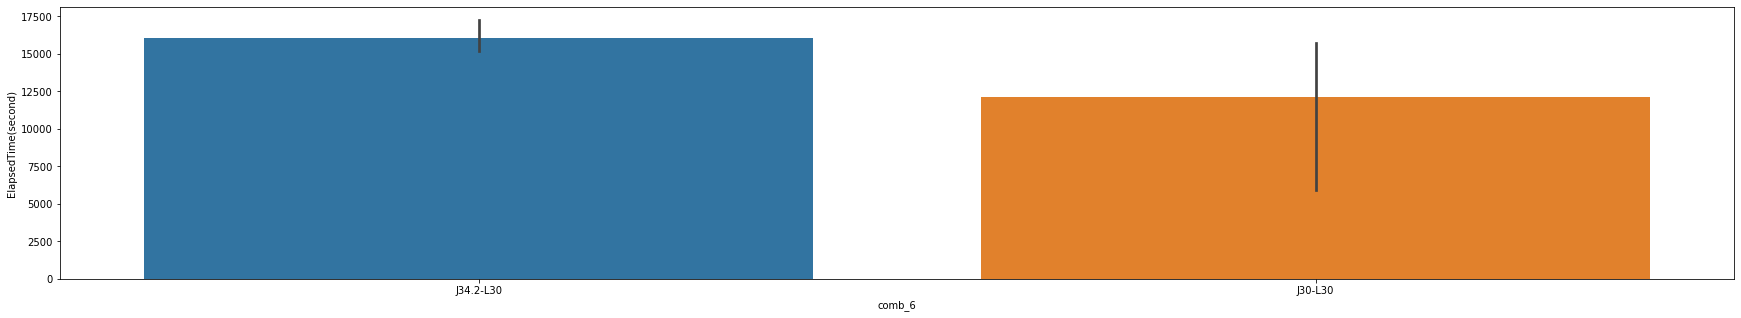

In [98]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x="comb_6", y="ElapsedTime(second)", data=v)
plt.show()

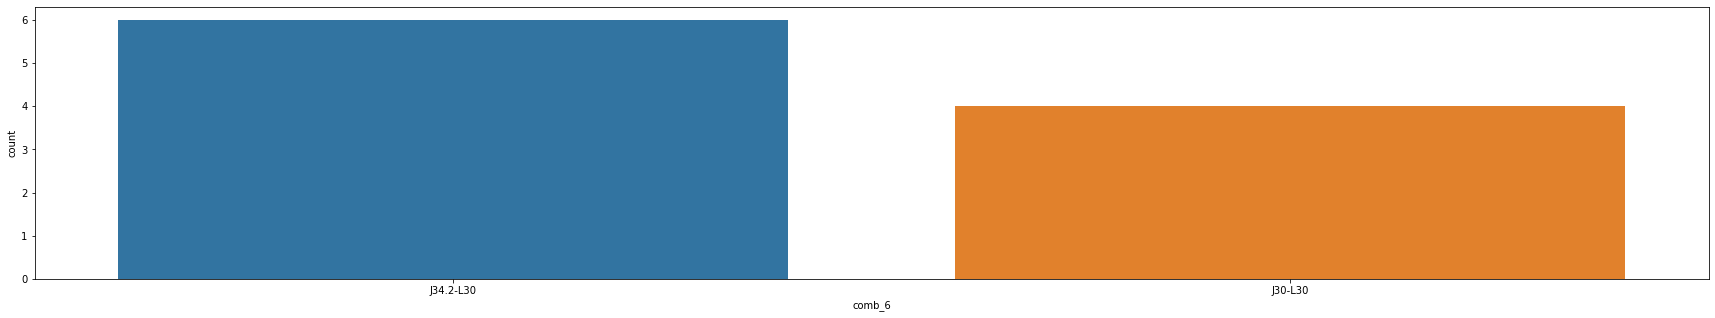

In [73]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.countplot(x="comb_6", data=v)
plt.show()

In [99]:
train.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
0,1829,{'L05'},{'C'},Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333
1,1104,{'N20.1'},{'C'},Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972
2,1850,{'K80.8'},{'B'},Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647
3,1059,"{nan, 'M51.1'}","{0, 'B'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871
4,608,"{'M51.1', nan, 'M48.0'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046


In [77]:
from tqdm import tqdm
from tqdm.notebook import tqdm
tqdm.pandas()
import itertools

# example DataFrame

# function to generate all possible combinations for a set of diagnoses
def generate_combinations(diagnoses):
    diagnoses = [d for d in diagnoses if pd.notna(d)]
    first_chars = [diag[0] for diag in diagnoses]
    combinations = []
    for i in range(1, len(diagnoses)+1):
        for combo in itertools.combinations(first_chars, i):
            combinations.append('-'.join(combo))
    return combinations

# generate all combinations for each patient and add them as new columns to the DataFrame
for i, row in tqdm(z.iterrows(), total=len(z)):
    combos = generate_combinations(row['Diagnosis2'])
    for j, combo in enumerate(combos):
        col_name = f'comb_{j+1}'
        z.at[i, col_name] = combo

# drop original 'Diagnosis' column

print(z)

  0%|          | 0/2820 [00:00<?, ?it/s]

        ID DiagnosticICD10Code     SurgeryGroup   AnesthesiaType  \
0     1829                 L05              [3]  Spinal Anestezi   
1     1104               N20.1              [3]  Spinal Anestezi   
2     1850               K80.8              [4]   Genel Anestezi   
3     1059          nan, M51.1           [1, 4]   Genel Anestezi   
4      608   M51.1, nan, M48.0  [1, 4, 3, 2, 5]   Genel Anestezi   
...    ...                 ...              ...              ...   
2817    73                 NaN           [4, 3]              NaN   
2818    12                 NaN           [1, 1]              NaN   
2819   110                 NaN              [4]              NaN   
2820  2572                 NaN              [4]              NaN   
2821  1357                 NaN              [2]              NaN   

                                            SurgeryName  Age     Sex  \
0                                        Pilonidal kist   26    MALE   
1                                      

In [80]:
z.tail()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Diagnosis2,contain_nan,sum,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31
2817,73,NaN,"[4, 3]",NaN,NaN,59,FEMALE,ORTOPED? SERV?S?,32,7,8079,[],0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2818,12,NaN,"[1, 1]",NaN,"Alt ekstremitenin variköz venleri, ülserli",48,FEMALE,GENEL KARMA CERRAH? SERV?S?,8,5,2304,[],0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2819,110,NaN,[4],NaN,"Bilateral inguinal herni, obstrüksiyonsuz veya...",55,MALE,GENEL CERRAH? SERV?S?,33,11,5211,[],0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2820,2572,NaN,[4],NaN,"Derinin ve subkutanöz dokunun lokalize ?i?me, ...",49,FEMALE,GENEL CERRAH? SERV?S?,29,2,3308,[],0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2821,1357,NaN,[2],NaN,Blefarospazm,38,FEMALE,PLAST?K CERRAH?,28,14,5690,[],0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
z.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Diagnosis2,contain_nan,sum,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31
0,1829,L05,[3],Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333,[L05],0,3,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1104,N20.1,[3],Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972,[N20.1],0,3,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,K80.8,[4],Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647,[K80.8],0,4,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1059,"nan, M51.1","[1, 4]",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871,[M51.1],1,5,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,608,"M51.1, nan, M48.0","[1, 4, 3, 2, 5]",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046,"[M48.0, M51.1]",1,15,M,M,M-M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
app_train_clean[app_train_clean["comb_7"].isna()==False][:7]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31
13,2544,"nan, K21, M17.9, I87.2","B, C",Spinal Anestezi,"Gonartroz, tan?mlanmam??",58,FEMALE,ORTOPED? SERV?S?,32,13,6567,1,"[I87.2, K21, M17.9]","[4, 3]",7,2,3.5,0.500000,4,3,I,K,M,I-K,I-M,K-M,I-K-M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,3014,"M50.1, Z00.0, E03.9",A3,Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",44,FEMALE,NÖRO??RÜRJ? SERV?S?,42,6,9818,0,"[E03.9, M50.1, Z00.0]",[5],5,1,5.0,0.000000,5,5,E,M,Z,E-M,E-Z,M-Z,E-M-Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,2426,"J30, L30, J34.2","D, B, C",Genel Anestezi,Nazal septum deviasyonu,19,FEMALE,KBB SERV?S?,18,14,16330,0,"[J34.2, J30, L30]","[2, 4, 3]",9,3,3.0,0.816497,4,2,J,J,L,J-J,J-L,J-L,J-J-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,3623,"L30.8, M79.1, K29.1, K40",C,Spinal Anestezi,"Bilateral inguinal herni, obstrüksiyonsuz veya...",41,MALE,GENEL CERRAH? SERV?S?,29,12,4115,0,"[K29.1, K40, L30.8, M79.1]",[3],3,1,3.0,0.000000,3,3,K,K,L,M,K-K,K-L,K-M,K-L,K-M,L-M,K-K-L,K-K-M,K-L-M,K-L-M,K-K-L-M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,3360,"L30.8, M79.1, K40.9",C,Spinal Anestezi,"Bilateral inguinal herni, obstrüksiyonsuz veya...",44,MALE,GENEL CERRAH? SERV?S?,29,4,4339,0,"[K40.9, L30.8, M79.1]",[3],3,1,3.0,0.000000,3,3,K,L,M,K-L,K-M,L-M,K-L-M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,1571,"W19, Z00.8, S52.20",B,Genel Anestezi,"Ulna ?aft? k?r???, kapal?",52,MALE,ORTOPED? SERV?S?,40,12,5410,0,"[S52.20, W19, Z00.8]",[4],4,1,4.0,0.000000,4,4,S,W,Z,S-W,S-Z,W-Z,S-W-Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,3103,"Z41.2, L30.3, K40.9","D, C",Genel Anestezi,Rutin ve dini sünnet,7,MALE,ÜROLOJ? SERV?S?,15,11,6234,0,"[K40.9, L30.3, Z41.2]","[2, 3]",5,2,2.5,0.500000,3,2,K,L,Z,K-L,K-Z,L-Z,K-L-Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


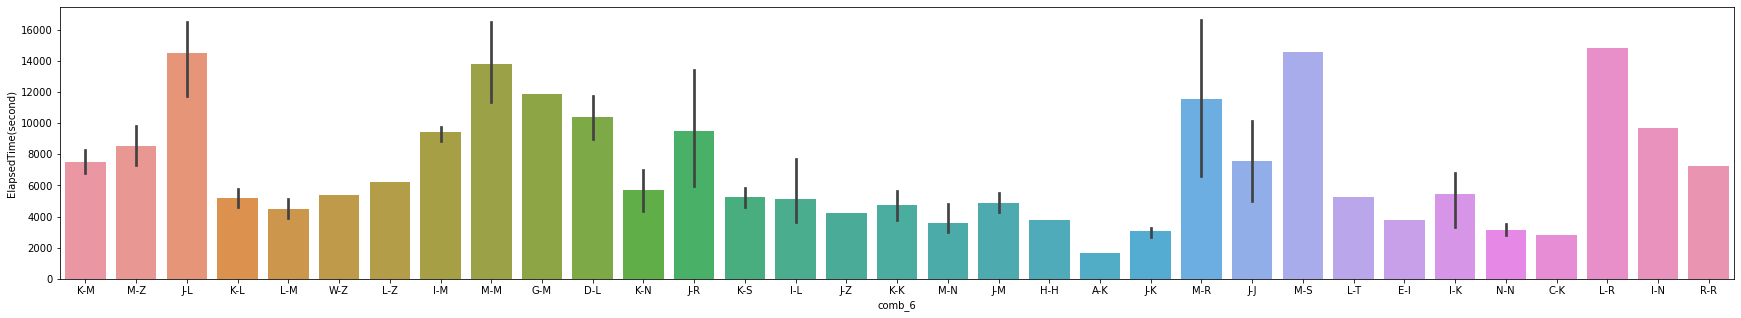

In [83]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x="comb_6", y="ElapsedTime(second)", data=app_train_clean)
plt.show()

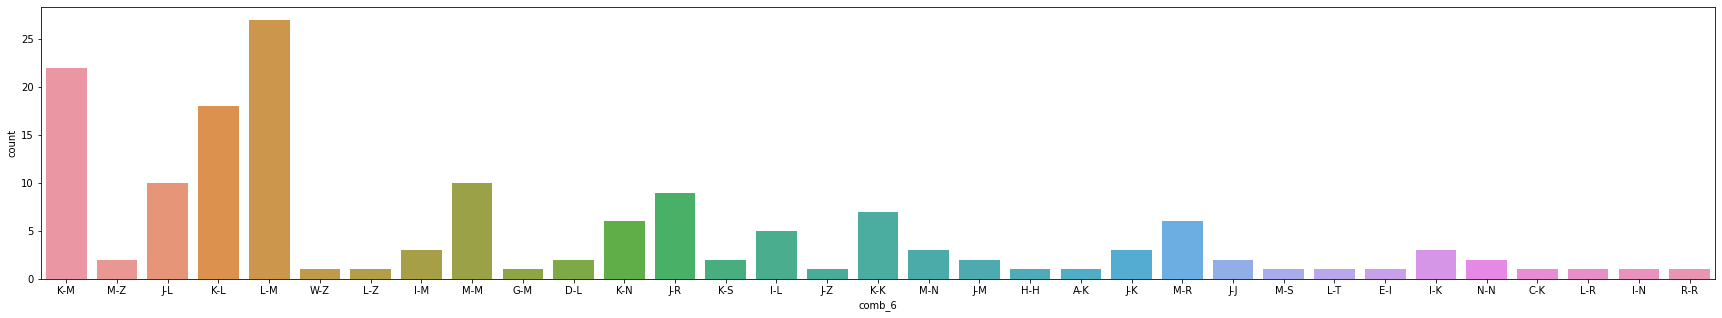

In [84]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.countplot(x="comb_6", data=app_train_clean)
plt.show()

## to-do: combination of every diagnosis, first sort diagnosis codes

In [91]:
df = app_train_clean[app_train_clean["DiagnosticICD10Code"].str.contains('M', na=False) & app_train_clean["DiagnosticICD10Code"].str.contains('R', na=False)]
df2 = app_train_clean[app_train_clean["DiagnosticICD10Code"].str.contains('M', na=False)]
app_train_clean.iloc[df["ElapsedTime(second)"].sort_values().index]


,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31
1265,823,K40,B,Spinal Anestezi,"Bilateral inguinal herni, gangrenli",62,MALE,GENEL CERRAH? SERV?S?,33,13,3835,0,[K40],[4],4,1,4.0,0.0,4,4,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800,509,"I83, nan","0, E",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,37,FEMALE,KVC SERV?S?,8,6,2090,0,[I83],"[1, 1]",2,2,1.0,0.0,1,1,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2087,3282,K60.3,C,Spinal Anestezi,"Bilateral inguinal herni, obstrüksiyonsuz veya...",40,MALE,GENEL CERRAH? SERV?S?,5,6,2486,0,[K60.3],[3],3,1,3.0,0.0,3,3,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
627,3171,H25.1,C,Sedo Analjezi,"Senil kataraktlar, di?er",46,MALE,GÖZ HASTALIKLARI SERV?S?,49,16,2017,0,[H25.1],[3],3,1,3.0,0.0,3,3,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2636,2757,NaN,C,NaN,"Umbilikal herni; obstrüksiyonlu, gangrensiz",63,MALE,GENEL CERRAH? SERV?S?,47,14,3995,0,[],[3],3,1,3.0,0.0,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
693,2645,K40,B,Spinal Anestezi,"Bilateral inguinal herni, obstrüksiyonsuz veya...",47,MALE,GENEL CERRAH? SERV?S?,43,6,4274,0,[K40],[4],4,1,4.0,0.0,4,4,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1484,3291,"nan, Z01.4",0,Sedo Analjezi,Jinekolojik muayene (genel) (ola?an),41,FEMALE,KADIN DO?UM SERV?S?,48,4,697,1,[Z01.4],[1],1,1,1.0,0.0,1,1,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1281,1933,"nan, K40","B, C",Spinal Anestezi,Pilonidal kist,69,MALE,GENEL CERRAH? SERV?S?,43,2,4951,1,[K40],"[4, 3]",7,2,3.5,0.5,4,3,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


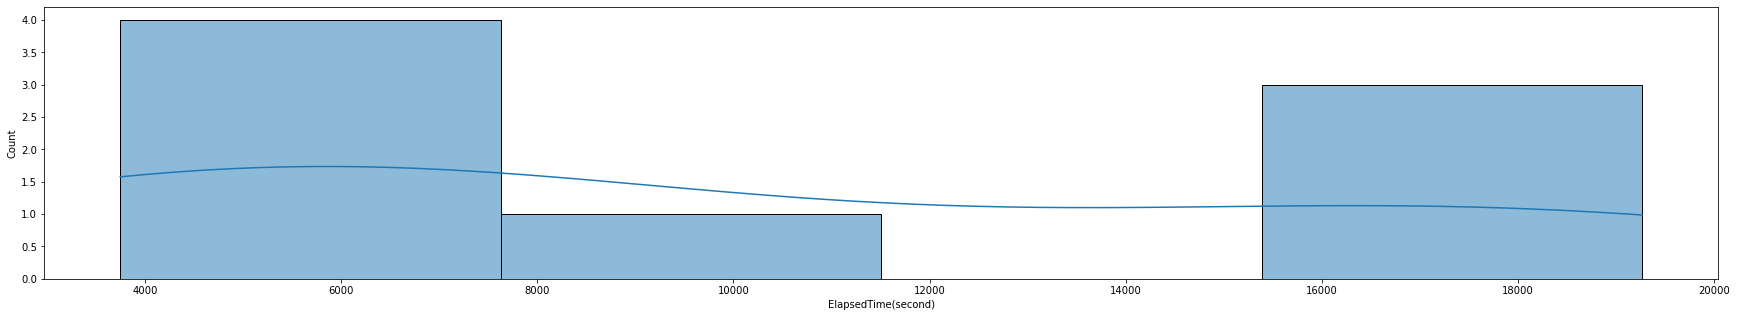

In [92]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.histplot(x="ElapsedTime(second)", data=df, kde=True)
plt.show()


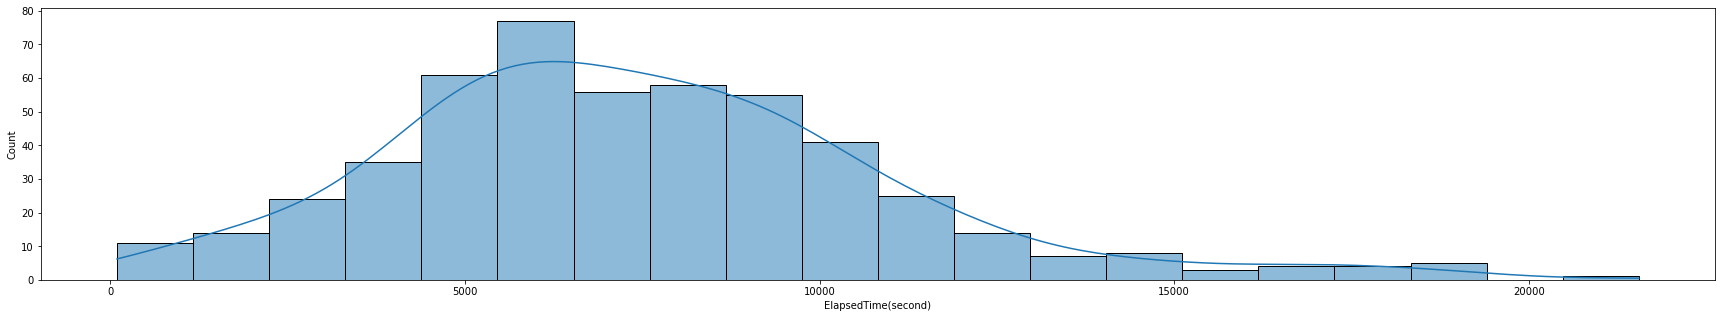

In [93]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.histplot(x="ElapsedTime(second)", data=df2, kde=True)
plt.show()


## TODO:  ML

In [96]:
train.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
0,1829,{'L05'},{'C'},Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333
1,1104,{'N20.1'},{'C'},Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972
2,1850,{'K80.8'},{'B'},Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647
3,1059,"{nan, 'M51.1'}","{0, 'B'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871
4,608,"{'M51.1', nan, 'M48.0'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046


In [95]:
app_train_clean.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31
0,1829,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333,0,[L05],[3],3,1,3.0,0.000000,3,3,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1104,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972,0,[N20.1],[3],3,1,3.0,0.000000,3,3,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647,0,[K80.8],[4],4,1,4.0,0.000000,4,4,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1059,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871,1,[M51.1],"[1, 4]",5,2,2.5,1.500000,4,1,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,608,"M51.1, nan, M48.0","0, B, C, D, A3",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046,1,"[M51.1, M48.0]","[1, 4, 3, 2, 5]",15,5,3.0,1.414214,5,1,M,M,M-M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
app_train_encode = app_train_clean.copy()
app_train_encode.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31
0,1829,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333,0,[L05],[3],3,1,3.0,0.000000,3,3,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1104,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972,0,[N20.1],[3],3,1,3.0,0.000000,3,3,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647,0,[K80.8],[4],4,1,4.0,0.000000,4,4,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1059,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871,1,[M51.1],"[1, 4]",5,2,2.5,1.500000,4,1,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,608,"M51.1, nan, M48.0","0, B, C, D, A3",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046,1,"[M51.1, M48.0]","[1, 4, 3, 2, 5]",15,5,3.0,1.414214,5,1,M,M,M-M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
app_test_encode = app_test_clean.copy()
app_test_encode.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31
0,1669,H26.9,C,Sedo Analjezi,NaN,70,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,13,0,[H26.9],[3],3,1,3.0,0.0,3,3,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2091,L05.9,C,Spinal Anestezi,Pilonidal kist,41,MALE,GENEL CERRAH? SERV?S?,36,6,0,[L05.9],[3],3,1,3.0,0.0,3,3,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,585,M50.1,A3,Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",59,FEMALE,ORTOPED? SERV?S?,42,14,0,[M50.1],[5],5,1,5.0,0.0,5,5,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1455,S42.2,B,Genel Anestezi,Humerus üst uç k?r???,54,FEMALE,ORTOPED? SERV?S?,23,14,0,[S42.2],[4],4,1,4.0,0.0,4,4,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1801,I82,"0, E",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,50,MALE,KVC SERV?S?,46,13,0,[I82],"[1, 1]",2,2,1.0,0.0,1,1,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
app_train_encode["Age"].min()

0

In [112]:
app_train_encode['Age_Range'] = pd.cut(app_train_encode['Age'], bins=[0, 18, 45, 65, 102], labels=['child', 'young', 'mid', 'old'])


In [131]:
app_test_encode['Age_Range'] = pd.cut(app_test_encode['Age'], bins=[0, 18, 45, 65, 102], labels=['child', 'young', 'mid', 'old'])


In [132]:
app_train_encode.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31,Age_Range
0,1829,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333,0,[L05],[3],3,1,3.0,0.000000,3,3,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,young
1,1104,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972,0,[N20.1],[3],3,1,3.0,0.000000,3,3,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,young
2,1850,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647,0,[K80.8],[4],4,1,4.0,0.000000,4,4,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,young
3,1059,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871,1,[M51.1],"[1, 4]",5,2,2.5,1.500000,4,1,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,young
4,608,"M51.1, nan, M48.0","0, B, C, D, A3",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046,1,"[M51.1, M48.0]","[1, 4, 3, 2, 5]",15,5,3.0,1.414214,5,1,M,M,M-M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mid


In [133]:
app_test_encode.head()


,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31,Age_Range
0,1669,H26.9,C,Sedo Analjezi,NaN,70,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,13,0,[H26.9],[3],3,1,3.0,0.0,3,3,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,old
1,2091,L05.9,C,Spinal Anestezi,Pilonidal kist,41,MALE,GENEL CERRAH? SERV?S?,36,6,0,[L05.9],[3],3,1,3.0,0.0,3,3,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,young
2,585,M50.1,A3,Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",59,FEMALE,ORTOPED? SERV?S?,42,14,0,[M50.1],[5],5,1,5.0,0.0,5,5,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mid
3,1455,S42.2,B,Genel Anestezi,Humerus üst uç k?r???,54,FEMALE,ORTOPED? SERV?S?,23,14,0,[S42.2],[4],4,1,4.0,0.0,4,4,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mid
4,1801,I82,"0, E",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,50,MALE,KVC SERV?S?,46,13,0,[I82],"[1, 1]",2,2,1.0,0.0,1,1,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mid


In [134]:
list(app_train_encode.columns).index('comb_1')

20

In [138]:
col = list(app_train_encode.columns[3:5]) + list(app_train_encode.columns[6:10]) + list(app_train_encode.columns[20:])
col

['AnesthesiaType',
 'SurgeryName',
 'Sex',
 'Service',
 'DoctorID',
 'AnaesthetistID',
 'comb_1',
 'comb_2',
 'comb_3',
 'comb_4',
 'comb_5',
 'comb_6',
 'comb_7',
 'comb_8',
 'comb_9',
 'comb_10',
 'comb_11',
 'comb_12',
 'comb_13',
 'comb_14',
 'comb_15',
 'comb_16',
 'comb_17',
 'comb_18',
 'comb_19',
 'comb_20',
 'comb_21',
 'comb_22',
 'comb_23',
 'comb_24',
 'comb_25',
 'comb_26',
 'comb_27',
 'comb_28',
 'comb_29',
 'comb_30',
 'comb_31',
 'Age_Range']

In [142]:
col2 = list(app_test_encode.columns[3:5]) + list(app_test_encode.columns[6:10]) + list(app_test_encode.columns[19:])
col2

['AnesthesiaType',
 'SurgeryName',
 'Sex',
 'Service',
 'DoctorID',
 'AnaesthetistID',
 'comb_1',
 'comb_2',
 'comb_3',
 'comb_4',
 'comb_5',
 'comb_6',
 'comb_7',
 'comb_8',
 'comb_9',
 'comb_10',
 'comb_11',
 'comb_12',
 'comb_13',
 'comb_14',
 'comb_15',
 'comb_16',
 'comb_17',
 'comb_18',
 'comb_19',
 'comb_20',
 'comb_21',
 'comb_22',
 'comb_23',
 'comb_24',
 'comb_25',
 'comb_26',
 'comb_27',
 'comb_28',
 'comb_29',
 'comb_30',
 'comb_31',
 'Age_Range']

In [143]:
set(col) - set(col2)

set()

In [117]:
app_train_encode.dtypes

ID                        int64
DiagnosticICD10Code      object
SurgeryGroup             object
AnesthesiaType           object
SurgeryName              object
Age                       int64
Sex                      object
Service                  object
DoctorID                  int64
AnaesthetistID            int64
ElapsedTime(second)       int64
Any_NaN_Diagnos           int64
Diagnos_Clean            object
SurgeryGroup_Encode      object
SurgeryGroup_Sum          int32
SurgeryGroup_Count        int64
SurgeryGroup_Avg        float64
SurgeryGroup_Std        float64
SurgeryGroup_Max          int32
SurgeryGroup_Min          int32
comb_1                   object
comb_2                   object
comb_3                   object
comb_4                   object
comb_5                   object
comb_6                   object
comb_7                   object
comb_8                   object
comb_9                   object
comb_10                  object
comb_11                  object
comb_12 

In [136]:
app_train_encode.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31,Age_Range
0,1829,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333,0,[L05],[3],3,1,3.0,0.000000,3,3,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,young
1,1104,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972,0,[N20.1],[3],3,1,3.0,0.000000,3,3,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,young
2,1850,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647,0,[K80.8],[4],4,1,4.0,0.000000,4,4,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,young
3,1059,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871,1,[M51.1],"[1, 4]",5,2,2.5,1.500000,4,1,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,young
4,608,"M51.1, nan, M48.0","0, B, C, D, A3",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046,1,"[M51.1, M48.0]","[1, 4, 3, 2, 5]",15,5,3.0,1.414214,5,1,M,M,M-M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mid


In [144]:
app_test_encode.head()


,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31,Age_Range
0,1669,H26.9,C,Sedo Analjezi,NaN,70,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,13,0,[H26.9],[3],3,1,3.0,0.0,3,3,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,old
1,2091,L05.9,C,Spinal Anestezi,Pilonidal kist,41,MALE,GENEL CERRAH? SERV?S?,36,6,0,[L05.9],[3],3,1,3.0,0.0,3,3,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,young
2,585,M50.1,A3,Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",59,FEMALE,ORTOPED? SERV?S?,42,14,0,[M50.1],[5],5,1,5.0,0.0,5,5,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mid
3,1455,S42.2,B,Genel Anestezi,Humerus üst uç k?r???,54,FEMALE,ORTOPED? SERV?S?,23,14,0,[S42.2],[4],4,1,4.0,0.0,4,4,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mid
4,1801,I82,"0, E",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,50,MALE,KVC SERV?S?,46,13,0,[I82],"[1, 1]",2,2,1.0,0.0,1,1,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mid


In [137]:
t = pd.get_dummies(app_train_encode, columns=col)
t.head()

,ID,DiagnosticICD10Code,SurgeryGroup,Age,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,AnesthesiaType_Epidural Anestezi,AnesthesiaType_Epidural ve Genel Anestezi,AnesthesiaType_Genel Anestezi,AnesthesiaType_Kombine Spinal Epidural Anestezi,AnesthesiaType_Lokal Anestezi,AnesthesiaType_Periferik Bloklar,AnesthesiaType_Periferik Bloklar ve Genel Anestezi,AnesthesiaType_Rejyonel Sinir Blo?u,AnesthesiaType_Sedo Analjezi,AnesthesiaType_Seçilmemi?,AnesthesiaType_Spinal Anestezi,AnesthesiaType_Spinal ve Genel Anestezi,SurgeryName_?alazyon,SurgeryName_?nguinal herni,"SurgeryName_?ntervertebral disk bozukluklar? di?er, tan?mlanmam??","SurgeryName_?ntervertebral disk bozukluklar? di?er, tan?mlanmam?? | Lomber vertebra k?r???","SurgeryName_?ntervertebral disk bozukluklar?, tan?mlanmam??","SurgeryName_A??r? kanama, premenapozal dönemde","SurgeryName_A??r? ve s?k menstrüasyon, düzenli siklus ile","SurgeryName_A??r? ve s?k menstrüasyon, düzensiz siklus ile",SurgeryName_A?il tendon yaralanmas?,"SurgeryName_A?r?, tan?mlanmam??","SurgeryName_Abdominal herni di?er, tan?mlanm?? obstrüksiyon ve gangrensiz","SurgeryName_Abdominal herni, obstrüksiyon ve gangrensiz tan?mlanmam??",SurgeryName_Adenoidlerin hipertrofisi,SurgeryName_Aksesuar meme,SurgeryName_Akut kolesistit,SurgeryName_Akut sistit,"SurgeryName_Allerjik rinit, di?er","SurgeryName_Alt ekstremitenin lokalize ?i?me, kitle ve yumrusu",SurgeryName_Alt ekstremitenin variköz venleri,"SurgeryName_Alt ekstremitenin variköz venleri, enflamasyonla birlikte","SurgeryName_Alt ekstremitenin variköz venleri, ülserli","SurgeryName_Alt üriner sistem ta??, tan?mlanmam??",SurgeryName_Anal fissür tan?mlanmam??,"SurgeryName_Anal fissür, akut","SurgeryName_Anal fissür, kronik",SurgeryName_Anal fistül,SurgeryName_Anal polip,SurgeryName_Ankiste hidrosel,SurgeryName_Anogenital (veneryal) Si?iller,"SurgeryName_Anormal uterus ve vajina kanamas?, tan?mlanmam??",SurgeryName_Anüs ve rektal bölge fissür ve fistülü,SurgeryName_Artiküler k?k?rdak di?er bozukluklar?,SurgeryName_Aya??n birden fazla k?r?klar?,SurgeryName_Ayak parma??n?n di?er k?r?klar?,"SurgeryName_Ayn? seviyeden dü?me, di?er","SurgeryName_Ba?(lar)n?n di?er spontan parçalanmas?, medial kollateral ligament","SurgeryName_Ba??n lokalize ?i?me, kitle ve yumrusu","SurgeryName_Bald?r?n birden fazla k?r?klar?, kapal?","SurgeryName_Bald?r?n k?r???, yer tan?mlanmam??",SurgeryName_Barsak fistülü,SurgeryName_Bel a?r?s?,SurgeryName_Belirgin kulak,SurgeryName_Benign lipomatöz neoplazm,"SurgeryName_Benign lipomatöz neoplazm, ba?, yüz ve boyun deri ve subkütanöz dokusu","SurgeryName_Benign lipomatöz neoplazm, di?er yerlerin","SurgeryName_Benign lipomatöz neoplazm, ekstremitelerin deri ve subkütanöz dokusunun","SurgeryName_Benign lipomatöz neoplazm, tan?mlanmam??",SurgeryName_Benign prostat hiperplazisi,"SurgeryName_Bilateral femoral herni, obstrüksiyonsuz veya gangrensiz","SurgeryName_Bilateral inguinal herni, gangrenli","SurgeryName_Bilateral inguinal herni, obstrüksiyonsuz veya gangrensiz","SurgeryName_Bilateral inguinal herni, obstrüksiyonsuz veya gangrensiz | Hidrosel, di?er","SurgeryName_Bilateral inguinal herni; obstrüksiyonlu, gangrensiz","SurgeryName_Birden fazla yerin lokalize ?i?me, kitle ve yumrusu",SurgeryName_Blefarit,SurgeryName_Blefaro?alazis,SurgeryName_Blefarospazm,"SurgeryName_Boynun lokalize ?i?me, kitle ve yumrusu",SurgeryName_Burnun kazan?lm?? deformitesi,SurgeryName_Burun k?k?rdak septum ç?k???,SurgeryName_Burun ve nazal sinüslerin di?er bozukluklar?,SurgeryName_Burun ve nazal sinüslerin di?er tan?mlanm?? bozukluklar?,SurgeryName_Böbrek ta??,SurgeryName_Böbrek ta?? | Üreter ta??,"SurgeryName_Böbrek ta??, üreter ta?? ile birlikte",SurgeryName_Böbrek ve üreter ta??,SurgeryName_Cisimlere çarpma veya onlarla di?er çarp??ma,"SurgeryName_D?? kulak bozukluklar?, ba?ka yerde s?n?flanm?? hastal?klarda",SurgeryName_D?? meme protezinin

In [145]:
y = pd.get_dummies(app_test_encode, columns=col)
y.head()

,ID,DiagnosticICD10Code,SurgeryGroup,Age,Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,AnesthesiaType_Epidural Anestezi,AnesthesiaType_Epidural ve Genel Anestezi,AnesthesiaType_Genel Anestezi,AnesthesiaType_Kombine Spinal Epidural Anestezi,AnesthesiaType_Lokal Anestezi,AnesthesiaType_Rejyonel Sinir Blo?u,AnesthesiaType_Sedo Analjezi,AnesthesiaType_Spinal Anestezi,AnesthesiaType_Spinal ve Genel Anestezi,SurgeryName_?alazyon,SurgeryName_?nguinal herni,"SurgeryName_?ntervertebral disk bozukluklar? di?er, tan?mlanmam??","SurgeryName_?ntervertebral disk bozukluklar?, tan?mlanmam??","SurgeryName_A??r? ve s?k menstrüasyon, düzenli siklus ile","SurgeryName_A??r? ve s?k menstrüasyon, düzensiz siklus ile",SurgeryName_A?il tendon yaralanmas?,"SurgeryName_A?r?, tan?mlanmam??","SurgeryName_Abdominal herni, obstrüksiyon ve gangrensiz tan?mlanmam??",SurgeryName_Adenoidlerin hipertrofisi,SurgeryName_Aksesuar meme,"SurgeryName_Akut lenfadenit, tan?mlanmam??","SurgeryName_Akut lenfadeniti, alt ekstremite",SurgeryName_Akut sistit,"SurgeryName_Alt ekstremitenin lokalize ?i?me, kitle ve yumrusu",SurgeryName_Alt ekstremitenin variköz venleri,"SurgeryName_Alt ekstremitenin variköz venleri, enflamasyonla birlikte","SurgeryName_Alt ekstremitenin variköz venleri, ülserli",SurgeryName_Anal fissür tan?mlanmam??,"SurgeryName_Anal fissür, akut","SurgeryName_Anal fissür, kronik",SurgeryName_Anal fistül,SurgeryName_Ankiste hidrosel,SurgeryName_Anogenital (veneryal) Si?iller,"SurgeryName_Anormal uterus ve vajina kanamas?, tan?mlanmam??",SurgeryName_Artiküler k?k?rdak di?er bozukluklar?,"SurgeryName_Artroz, tan?mlanmam??, omuz bölgesi",SurgeryName_Aya??n birden fazla k?r?klar?,SurgeryName_Ayak parma??n?n di?er k?r?klar?,"SurgeryName_Ayn? seviyeden dü?me, di?er","SurgeryName_Ba??n lokalize ?i?me, kitle ve yumrusu","SurgeryName_Bald?r?n k?r???, yer tan?mlanmam??",SurgeryName_Bel a?r?s?,"SurgeryName_Benign lipomatöz neoplazm, ba?, yüz ve boyun deri ve subkütanöz dokusu","SurgeryName_Benign meme displazisi, tan?mlanmam??",SurgeryName_Benign prostat hiperplazisi,"SurgeryName_Bilateral inguinal herni, gangrenli","SurgeryName_Bilateral inguinal herni, obstrüksiyonsuz veya gangrensiz","SurgeryName_Bilateral inguinal herni, obstrüksiyonsuz veya gangrensiz | Hidrosel, di?er","SurgeryName_Bilateral inguinal herni; obstrüksiyonlu, gangrensiz","SurgeryName_Bilateral inguinal herni; obstrüksiyonlu, gangrensiz | Tek tarafl? veya tan?mlanmam?? inguinal herni, gangrenli","SurgeryName_Birden fazla yerin lokalize ?i?me, kitle ve yumrusu",SurgeryName_Blefaro?alazis,SurgeryName_Blefarospazm,"SurgeryName_Boynun lokalize ?i?me, kitle ve yumrusu",SurgeryName_Burnun kazan?lm?? deformitesi,SurgeryName_Burun ve nazal sinüslerin di?er bozukluklar?,SurgeryName_Burun ve nazal sinüslerin di?er tan?mlanm?? bozukluklar?,SurgeryName_Böbrek ta??,"SurgeryName_Böbrek ta??, üreter ta?? ile birlikte",SurgeryName_Böbrek ve üreter ta??,SurgeryName_Cisimlere çarpma veya onlarla di?er çarp??ma,SurgeryName_D?? meme protezinin uygulamas?,"SurgeryName_Derinin ve subkutanöz dokunun lokalize ?i?me, kitle ve yumrusu","SurgeryName_Di?er iç yerle?im bozukluklar?, medial kollateral ligament veya di?er ve tan?mlanmam?? medial menisküs",SurgeryName_Di?er tan?mlanm?? eklem bozukluklar?,"SurgeryName_Di?er tan?mlanm?? eklem bozukluklar?, birden fazla yer",SurgeryName_Diz (anterior) (posterior) çapraz ligament burkulma ve gerilmesi,SurgeryName_Diz artiküler k?k?rdak y?rt???,"SurgeryName_Dizin iç yerle?im bozuklu?u, tan?mlanmam??","SurgeryName_Dü?me, tan?mlanmam??","SurgeryName_Düzensiz menstrüasyon, di?er tan?mlanm??",SurgeryName_Eklem a?r?s?,"SurgeryName_El bile?i ve elin di?er ve tan?mlanmam?? k?s?mlar?n?n k?r???, kapal?",SurgeryName_Epididimis benign neoplazm?,SurgeryName_Ete do?ru büyüyen t?rnak,SurgeryName_Femur alt uç k?r???,"SurgeryName_Fibroblastik bozukluk, tan?mlanmam??","SurgeryName_Flask nöropatik m

In [148]:
t.drop(columns=["DiagnosticICD10Code", "SurgeryGroup", "Diagnos_Clean", "SurgeryGroup_Encode", "Sex_FEMALE", "ID"], inplace = True)

In [149]:
t.head()

,Age,ElapsedTime(second),Any_NaN_Diagnos,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,AnesthesiaType_Epidural Anestezi,AnesthesiaType_Epidural ve Genel Anestezi,AnesthesiaType_Genel Anestezi,AnesthesiaType_Kombine Spinal Epidural Anestezi,AnesthesiaType_Lokal Anestezi,AnesthesiaType_Periferik Bloklar,AnesthesiaType_Periferik Bloklar ve Genel Anestezi,AnesthesiaType_Rejyonel Sinir Blo?u,AnesthesiaType_Sedo Analjezi,AnesthesiaType_Seçilmemi?,AnesthesiaType_Spinal Anestezi,AnesthesiaType_Spinal ve Genel Anestezi,SurgeryName_?alazyon,SurgeryName_?nguinal herni,"SurgeryName_?ntervertebral disk bozukluklar? di?er, tan?mlanmam??","SurgeryName_?ntervertebral disk bozukluklar? di?er, tan?mlanmam?? | Lomber vertebra k?r???","SurgeryName_?ntervertebral disk bozukluklar?, tan?mlanmam??","SurgeryName_A??r? kanama, premenapozal dönemde","SurgeryName_A??r? ve s?k menstrüasyon, düzenli siklus ile","SurgeryName_A??r? ve s?k menstrüasyon, düzensiz siklus ile",SurgeryName_A?il tendon yaralanmas?,"SurgeryName_A?r?, tan?mlanmam??","SurgeryName_Abdominal herni di?er, tan?mlanm?? obstrüksiyon ve gangrensiz","SurgeryName_Abdominal herni, obstrüksiyon ve gangrensiz tan?mlanmam??",SurgeryName_Adenoidlerin hipertrofisi,SurgeryName_Aksesuar meme,SurgeryName_Akut kolesistit,SurgeryName_Akut sistit,"SurgeryName_Allerjik rinit, di?er","SurgeryName_Alt ekstremitenin lokalize ?i?me, kitle ve yumrusu",SurgeryName_Alt ekstremitenin variköz venleri,"SurgeryName_Alt ekstremitenin variköz venleri, enflamasyonla birlikte","SurgeryName_Alt ekstremitenin variköz venleri, ülserli","SurgeryName_Alt üriner sistem ta??, tan?mlanmam??",SurgeryName_Anal fissür tan?mlanmam??,"SurgeryName_Anal fissür, akut","SurgeryName_Anal fissür, kronik",SurgeryName_Anal fistül,SurgeryName_Anal polip,SurgeryName_Ankiste hidrosel,SurgeryName_Anogenital (veneryal) Si?iller,"SurgeryName_Anormal uterus ve vajina kanamas?, tan?mlanmam??",SurgeryName_Anüs ve rektal bölge fissür ve fistülü,SurgeryName_Artiküler k?k?rdak di?er bozukluklar?,SurgeryName_Aya??n birden fazla k?r?klar?,SurgeryName_Ayak parma??n?n di?er k?r?klar?,"SurgeryName_Ayn? seviyeden dü?me, di?er","SurgeryName_Ba?(lar)n?n di?er spontan parçalanmas?, medial kollateral ligament","SurgeryName_Ba??n lokalize ?i?me, kitle ve yumrusu","SurgeryName_Bald?r?n birden fazla k?r?klar?, kapal?","SurgeryName_Bald?r?n k?r???, yer tan?mlanmam??",SurgeryName_Barsak fistülü,SurgeryName_Bel a?r?s?,SurgeryName_Belirgin kulak,SurgeryName_Benign lipomatöz neoplazm,"SurgeryName_Benign lipomatöz neoplazm, ba?, yüz ve boyun deri ve subkütanöz dokusu","SurgeryName_Benign lipomatöz neoplazm, di?er yerlerin","SurgeryName_Benign lipomatöz neoplazm, ekstremitelerin deri ve subkütanöz dokusunun","SurgeryName_Benign lipomatöz neoplazm, tan?mlanmam??",SurgeryName_Benign prostat hiperplazisi,"SurgeryName_Bilateral femoral herni, obstrüksiyonsuz veya gangrensiz","SurgeryName_Bilateral inguinal herni, gangrenli","SurgeryName_Bilateral inguinal herni, obstrüksiyonsuz veya gangrensiz","SurgeryName_Bilateral inguinal herni, obstrüksiyonsuz veya gangrensiz | Hidrosel, di?er","SurgeryName_Bilateral inguinal herni; obstrüksiyonlu, gangrensiz","SurgeryName_Birden fazla yerin lokalize ?i?me, kitle ve yumrusu",SurgeryName_Blefarit,SurgeryName_Blefaro?alazis,SurgeryName_Blefarospazm,"SurgeryName_Boynun lokalize ?i?me, kitle ve yumrusu",SurgeryName_Burnun kazan?lm?? deformitesi,SurgeryName_Burun k?k?rdak septum ç?k???,SurgeryName_Burun ve nazal sinüslerin di?er bozukluklar?,SurgeryName_Burun ve nazal sinüslerin di?er tan?mlanm?? bozukluklar?,SurgeryName_Böbrek ta??,SurgeryName_Böbrek ta?? | Üreter ta??,"SurgeryName_Böbrek ta??, üreter ta?? ile birlikte",SurgeryName_Böbrek ve üreter ta??,SurgeryName_Cisimlere çarpma veya onlarla di?er çarp??ma,"SurgeryName_D?? kulak bozukluklar?, ba?ka yerde s?n?flanm?? hastal?klarda",SurgeryName_D?? meme protezinin uygulamas?,SurgeryName_D?? protez arac?n?n tan?mlanmam?? uygulamas?,S

In [150]:
y.drop(columns=["DiagnosticICD10Code", "SurgeryGroup", "Diagnos_Clean", "SurgeryGroup_Encode", "Sex_FEMALE", "ID"], inplace = True)


In [151]:
set(t.columns) - set(y.columns)

{'AnesthesiaType_Periferik Bloklar',
 'AnesthesiaType_Periferik Bloklar ve Genel Anestezi',
 'AnesthesiaType_Seçilmemi?',
 'DoctorID_1',
 'DoctorID_12',
 'DoctorID_44',
 'DoctorID_7',
 'ElapsedTime(second)',
 'SurgeryName_?ntervertebral disk bozukluklar? di?er, tan?mlanmam?? | Lomber vertebra k?r???',
 'SurgeryName_A??r? kanama, premenapozal dönemde',
 'SurgeryName_Abdominal herni di?er, tan?mlanm?? obstrüksiyon ve gangrensiz',
 'SurgeryName_Akut kolesistit',
 'SurgeryName_Allerjik rinit, di?er',
 'SurgeryName_Alt üriner sistem ta??, tan?mlanmam??',
 'SurgeryName_Anal polip',
 'SurgeryName_Anüs ve rektal bölge fissür ve fistülü',
 'SurgeryName_Ba?(lar)n?n di?er spontan parçalanmas?, medial kollateral ligament',
 'SurgeryName_Bald?r?n birden fazla k?r?klar?, kapal?',
 'SurgeryName_Barsak fistülü',
 'SurgeryName_Belirgin kulak',
 'SurgeryName_Benign lipomatöz neoplazm',
 'SurgeryName_Benign lipomatöz neoplazm, di?er yerlerin',
 'SurgeryName_Benign lipomatöz neoplazm, ekstremitelerin deri

In [122]:
t.to_csv("train_diag[0]_encoded.csv", index=False)

## Define Ordinal encode to max and min surgery group

In [123]:
t = pd.read_csv("./train_diag[0]_encoded.csv")
t.head()

,ID,DiagnosticICD10Code,SurgeryGroup,Age,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,AnesthesiaType_Epidural Anestezi,AnesthesiaType_Epidural ve Genel Anestezi,AnesthesiaType_Genel Anestezi,AnesthesiaType_Kombine Spinal Epidural Anestezi,AnesthesiaType_Lokal Anestezi,AnesthesiaType_Periferik Bloklar,AnesthesiaType_Periferik Bloklar ve Genel Anestezi,AnesthesiaType_Rejyonel Sinir Blo?u,AnesthesiaType_Sedo Analjezi,AnesthesiaType_Seçilmemi?,AnesthesiaType_Spinal Anestezi,AnesthesiaType_Spinal ve Genel Anestezi,SurgeryName_?alazyon,SurgeryName_?nguinal herni,"SurgeryName_?ntervertebral disk bozukluklar? di?er, tan?mlanmam??","SurgeryName_?ntervertebral disk bozukluklar? di?er, tan?mlanmam?? | Lomber vertebra k?r???","SurgeryName_?ntervertebral disk bozukluklar?, tan?mlanmam??","SurgeryName_A??r? kanama, premenapozal dönemde","SurgeryName_A??r? ve s?k menstrüasyon, düzenli siklus ile","SurgeryName_A??r? ve s?k menstrüasyon, düzensiz siklus ile",SurgeryName_A?il tendon yaralanmas?,"SurgeryName_A?r?, tan?mlanmam??","SurgeryName_Abdominal herni di?er, tan?mlanm?? obstrüksiyon ve gangrensiz","SurgeryName_Abdominal herni, obstrüksiyon ve gangrensiz tan?mlanmam??",SurgeryName_Adenoidlerin hipertrofisi,SurgeryName_Aksesuar meme,SurgeryName_Akut kolesistit,SurgeryName_Akut sistit,"SurgeryName_Allerjik rinit, di?er","SurgeryName_Alt ekstremitenin lokalize ?i?me, kitle ve yumrusu",SurgeryName_Alt ekstremitenin variköz venleri,"SurgeryName_Alt ekstremitenin variköz venleri, enflamasyonla birlikte","SurgeryName_Alt ekstremitenin variköz venleri, ülserli","SurgeryName_Alt üriner sistem ta??, tan?mlanmam??",SurgeryName_Anal fissür tan?mlanmam??,"SurgeryName_Anal fissür, akut","SurgeryName_Anal fissür, kronik",SurgeryName_Anal fistül,SurgeryName_Anal polip,SurgeryName_Ankiste hidrosel,SurgeryName_Anogenital (veneryal) Si?iller,"SurgeryName_Anormal uterus ve vajina kanamas?, tan?mlanmam??",SurgeryName_Anüs ve rektal bölge fissür ve fistülü,SurgeryName_Artiküler k?k?rdak di?er bozukluklar?,SurgeryName_Aya??n birden fazla k?r?klar?,SurgeryName_Ayak parma??n?n di?er k?r?klar?,"SurgeryName_Ayn? seviyeden dü?me, di?er","SurgeryName_Ba?(lar)n?n di?er spontan parçalanmas?, medial kollateral ligament","SurgeryName_Ba??n lokalize ?i?me, kitle ve yumrusu","SurgeryName_Bald?r?n birden fazla k?r?klar?, kapal?","SurgeryName_Bald?r?n k?r???, yer tan?mlanmam??",SurgeryName_Barsak fistülü,SurgeryName_Bel a?r?s?,SurgeryName_Belirgin kulak,SurgeryName_Benign lipomatöz neoplazm,"SurgeryName_Benign lipomatöz neoplazm, ba?, yüz ve boyun deri ve subkütanöz dokusu","SurgeryName_Benign lipomatöz neoplazm, di?er yerlerin","SurgeryName_Benign lipomatöz neoplazm, ekstremitelerin deri ve subkütanöz dokusunun","SurgeryName_Benign lipomatöz neoplazm, tan?mlanmam??",SurgeryName_Benign prostat hiperplazisi,"SurgeryName_Bilateral femoral herni, obstrüksiyonsuz veya gangrensiz","SurgeryName_Bilateral inguinal herni, gangrenli","SurgeryName_Bilateral inguinal herni, obstrüksiyonsuz veya gangrensiz","SurgeryName_Bilateral inguinal herni, obstrüksiyonsuz veya gangrensiz | Hidrosel, di?er","SurgeryName_Bilateral inguinal herni; obstrüksiyonlu, gangrensiz","SurgeryName_Birden fazla yerin lokalize ?i?me, kitle ve yumrusu",SurgeryName_Blefarit,SurgeryName_Blefaro?alazis,SurgeryName_Blefarospazm,"SurgeryName_Boynun lokalize ?i?me, kitle ve yumrusu",SurgeryName_Burnun kazan?lm?? deformitesi,SurgeryName_Burun k?k?rdak septum ç?k???,SurgeryName_Burun ve nazal sinüslerin di?er bozukluklar?,SurgeryName_Burun ve nazal sinüslerin di?er tan?mlanm?? bozukluklar?,SurgeryName_Böbrek ta??,SurgeryName_Böbrek ta?? | Üreter ta??,"SurgeryName_Böbrek ta??, üreter ta?? ile birlikte",SurgeryName_Böbrek ve üreter ta??,SurgeryName_Cisimlere çarpma veya onlarla di?er çarp??ma,"SurgeryName_D?? kulak bozukluklar?, ba?ka yerde s?n?flanm?? hastal?klarda",SurgeryName_D?? meme protezinin

In [156]:
filtered_cols = t.filter(like='gangrensiz veya obstr')
new_col = filtered_cols.sum(axis=1)
new_col.value_counts()

0    2675
1      39
dtype: int64

In [157]:
filtered_cols

,"SurgeryName_Tek tarafl? veya tan?mlanmam?? inguinal herni, gangrensiz veya obstrüksiyonsuz","SurgeryName_Tek tarafl? veya tan?mlanmam?? inguinal herni, gangrensiz veya obstrüksiyonsuz"
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2817,0,0
2818,0,0
2819,0,0
2820,0,0


In [158]:
t["SurgeryName_Tek tarafl? veya tan?mlanmam?? inguinal herni, gangrensiz veya obstrüksiyonsuz_merged"] = new_col

In [159]:
t.shape

(2714, 792)

In [160]:
t = t.drop(columns=filtered_cols.columns)

In [161]:
t.shape

(2714, 790)

In [162]:
filtered_cols = y.filter(like='gangrensiz veya obstr')
new_col = filtered_cols.sum(axis=1)
new_col.value_counts()

0    1201
1      10
dtype: int64

In [163]:
filtered_cols

,"SurgeryName_Tek tarafl? veya tan?mlanmam?? inguinal herni, gangrensiz veya obstrüksiyonsuz","SurgeryName_Tek tarafl? veya tan?mlanmam?? inguinal herni, gangrensiz veya obstrüksiyonsuz"
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1206,0,0
1207,0,0
1208,0,0
1209,0,0


In [164]:
y["SurgeryName_Tek tarafl? veya tan?mlanmam?? inguinal herni, gangrensiz veya obstrüksiyonsuz_merged"] = new_col

In [165]:
y.shape

(1211, 619)

In [166]:
y = y.drop(columns=filtered_cols.columns)

In [167]:
y.shape

(1211, 617)

In [168]:
w = t.copy()
s = y.copy()

In [169]:
w.shape

(2714, 790)

In [170]:
s.shape

(1211, 617)

In [173]:
target = w["ElapsedTime(second)"]

In [174]:
w, s = w.align(s, join = 'inner', axis = 1)

In [175]:
w.shape

(2714, 601)

In [177]:
s.shape

(1211, 601)

In [178]:
w["ElapsedTime(second)"] = target


In [180]:
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import re


y = w["ElapsedTime(second)"]
X = w.drop(columns=["ElapsedTime(second)"])
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

mse_errs = []
rmse_errs = []
mae_errs = []
r2_errs = []

models = []

kf = KFold(n_splits=10, shuffle=True, random_state= 42)

for split_train, split_val in list(kf.split(X)):
    
    split_train = X.index[split_train]
    split_val = X.index[split_val]
    
    X_train, y_train = X.loc[split_train], y.loc[split_train]
    X_val, y_val = X.loc[split_val], y.loc[split_val]
    print("Train shape:", X_train.shape, "|", "Val Shape:", X_val.shape)

    model = lgb.LGBMRegressor()
    

    model.fit(X_train, y_train, eval_metric = 'mae',
                eval_set = [(X_val, y_val), (X_train, y_train)],
                eval_names = ['valid', 'train'],
                early_stopping_rounds = 100, verbose = 200)
    
    preds = model.predict(X_val)
    
    rmse_err = mean_squared_error(y_val, preds, squared=False)
    print("Fold RMSE: ", rmse_err)
    rmse_errs.append(rmse_err)

    mse_err = mean_squared_error(y_val, preds)
    print("Fold MSE: ", mse_err)
    mse_errs.append(mse_err)

    mae_err = mean_absolute_error(y_val, preds)
    print("Fold MAE: ", mae_err)
    mae_errs.append(mae_err)

    r2_err = r2_score(y_val, preds)
    print("Fold R2: ", r2_err)
    r2_errs.append(r2_err)

    models.append(model)
    
    print("\n", "*"*70, "\n")

import plotly.express as px
importance = [model.feature_importances_ for model in models]

f_importance = pd.concat([pd.Series(X.columns.to_list(),name='Feature'),
                        pd.Series(np.mean(importance,axis=0),name="Importance")],
                        axis=1).sort_values(by='Importance',
                                            ascending=True)

fig = px.bar(f_importance.tail(20),x='Importance',y='Feature')
fig.update_layout(
    title_text="First 20 Important Features - CatBoost Average of Folds"
)
fig.show()

Train shape: (2442, 601) | Val Shape: (272, 601)


c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fold RMSE:  1610.8638468422248
Fold MSE:  2594882.3330633305
Fold MAE:  1144.3146788958654
Fold R2:  0.7252772693479783

 ********************************************************************** 

Train shape: (2442, 601) | Val Shape: (272, 601)


c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fold RMSE:  1697.8592694673137
Fold MSE:  2882726.09891608
Fold MAE:  1130.7585135560628
Fold R2:  0.7714286456818256

 ********************************************************************** 

Train shape: (2442, 601) | Val Shape: (272, 601)


c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fold RMSE:  1446.9982472302418
Fold MSE:  2093803.9274873917
Fold MAE:  991.8000628397434
Fold R2:  0.7495479990654295

 ********************************************************************** 

Train shape: (2442, 601) | Val Shape: (272, 601)


c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fold RMSE:  1518.010147254768
Fold MSE:  2304354.8071684428
Fold MAE:  1087.2117946535418
Fold R2:  0.6842870627569582

 ********************************************************************** 

Train shape: (2443, 601) | Val Shape: (271, 601)


c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fold RMSE:  1337.0870919459378
Fold MSE:  1787801.891448445
Fold MAE:  923.1293320216354
Fold R2:  0.7662533900188367

 ********************************************************************** 

Train shape: (2443, 601) | Val Shape: (271, 601)


c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fold RMSE:  1633.364222392964
Fold MSE:  2667878.682993372
Fold MAE:  1075.2056659062068
Fold R2:  0.6889949319015634

 ********************************************************************** 

Train shape: (2443, 601) | Val Shape: (271, 601)


c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fold RMSE:  1831.9595498561603
Fold MSE:  3356075.792309185
Fold MAE:  1176.1040534738406
Fold R2:  0.6540730060692546

 ********************************************************************** 

Train shape: (2443, 601) | Val Shape: (271, 601)


c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fold RMSE:  1586.3685487417058
Fold MSE:  2516565.1724368655
Fold MAE:  1048.3735557136472
Fold R2:  0.7501200507598975

 ********************************************************************** 

Train shape: (2443, 601) | Val Shape: (271, 601)


c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fold RMSE:  1500.718655822987
Fold MSE:  2252156.483935153
Fold MAE:  1039.4101203841215
Fold R2:  0.6845903291537458

 ********************************************************************** 

Train shape: (2443, 601) | Val Shape: (271, 601)


c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fold RMSE:  1652.6690992380861
Fold MSE:  2731315.151576427
Fold MAE:  1109.6139654558592
Fold R2:  0.7034002647894078

 ********************************************************************** 



In [182]:
test.shape

(1211, 10)

In [183]:
s.shape

(1211, 601)

In [184]:
user_id = test["ID"]

model_preds = [model.predict(s) for model in models]
model_preds

[array([2622.98483057, 3361.44511507, 8935.89312468, ..., 2605.91907694,
        2625.08121876, 5478.43826585]),
 array([2337.8643824 , 3245.27672486, 7740.21412601, ..., 3620.2616973 ,
        3386.56605133, 5888.47626082]),
 array([2576.22903197, 3033.99271671, 7923.37755342, ..., 3055.81286904,
        2859.74983434, 5230.0120925 ]),
 array([2647.94176101, 3002.86903213, 8731.02136298, ..., 4042.18856337,
        3274.44552027, 6371.42992048]),
 array([2462.12989204, 3034.34843869, 8396.02655817, ..., 3282.42159821,
        3309.53922809, 5596.47904061]),
 array([2599.93104651, 3546.75381622, 7629.74390147, ..., 3656.39905945,
        3065.45649731, 5446.15286592]),
 array([2542.31592606, 3082.9828699 , 7452.3772571 , ..., 3475.01044041,
        2965.26350684, 5788.68889857]),
 array([2249.11657406, 2993.48235514, 7796.45519345, ..., 3692.43850395,
        3600.25437727, 5967.0940848 ]),
 array([2585.42223629, 3163.56809421, 7883.68039508, ..., 3411.23847388,
        2983.15210875, 

In [197]:
sample_submission = pd.DataFrame()
sample_submission['ID'] = user_id
sample_submission['ElapsedTime(second)'] = np.round(np.mean(model_preds,axis=0)).astype(int)

In [198]:
sample_submission.head()

,ID,ElapsedTime(second)
0,1669,2512
1,2091,3167
2,585,8050
3,1455,7798
4,1801,2474


In [191]:
sample_submission.head()

,ID,ElapsedTime(second)
0,1669,2512.075825
1,2091,3167.492738
2,585,8049.959634
3,1455,7797.925898
4,1801,2474.288899


In [199]:
sample_submission.shape

(1211, 2)

In [200]:
sample_submission.to_csv("sample_submission.csv", index = False)

In [ ]:
t.to_csv("train_diag[0]_encoded_merged_same_2column.csv", index=False)


<AxesSubplot:xlabel='Age', ylabel='ElapsedTime(second)'>

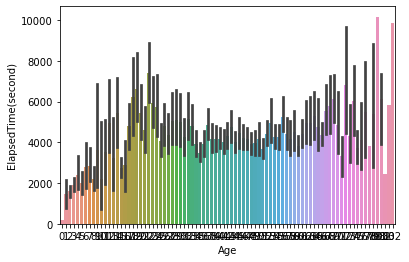

In [ ]:
sns.barplot(x="Age", y="ElapsedTime(second)", data=t)
